# Librerías y funciones a utilizar

In [ ]:
# Link al dataset 


# https://www.kaggle.com/datasets/trolukovich/apparel-images-dataset/data


In [2]:
#librerías instaladas en el entorno virtual

# !pip install tensorflow
# !pip install tensorflow-datasets

In [22]:
#librerías de python importadas

# generales 

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import gc
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns


# preprocess
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils  import load_img
from tensorflow.keras.utils import img_to_array
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing._data import StandardScaler
import cv2 as cv

# modelos
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras.models import load_model
from statsmodels.stats.contingency_tables import mcnemar



# callbacks

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import ReduceLROnPlateau


# clustering and dimension reduction
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn_extra.cluster import KMedoids
# for everything else
import os

In [4]:
model = VGG16()
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.layers[-1].get_config()

{'name': 'predictions',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'units': 1000,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [6]:
def cargar_imagen(img_path):
    try:
        # Cargar la imagen y redimensionarla
        img = load_img(img_path, target_size=(224, 224))
        # Convertir la imagen a un array
        img_array = np.array(img)
        # Reorganizar las dimensiones correctamente
        reshaped_img_array = img_array.reshape(1, 224, 224, 3)
        # Preprocesar la imagen
        preprocessed_img = preprocess_input(reshaped_img_array)
        return preprocessed_img
    except Exception as e:
        print(f"Error procesando la imagen {img_path}: {e}")
        return None

def dataset_builder(dataset_path):
    dataset = {}
    valid_formats = {".jpg", ".jpeg", ".tif", ".bmp", ".png"}
    
    # Itera por las carpetas de la ruta al dataset
    for class_folder in os.listdir(dataset_path):
        dataset[class_folder] = []
        class_path = os.path.join(dataset_path, class_folder)
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            _, img_format = os.path.splitext(img_path)
            if img_format.lower() in valid_formats:
                preprocessed_img = cargar_imagen(img_path)
                if preprocessed_img is not None:  # Validar si se procesó correctamente
                    dataset[class_folder].append(preprocessed_img)
                    
    return dataset

#Armo los vectores X e Y para el entrenamiento y prueba
def armar_vectores(dicc_preproceded_imgs, dicc_labels):
        
    X = []
    Y = []
    for indice in dicc_preproceded_imgs.keys():
        clase = dicc_preproceded_imgs[indice]
        label = dicc_labels[indice]
        largo_clase = len(clase)//2
        largo_label = len(clase)//2
        clase = clase[:largo_clase]
        label = label
        
        for img in clase:
            X.append(img)
            Y.append(label)

    print ("largo de X", len(X), "largo de Y", len(Y))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

    print ("largo de X_train", len(X_train), "largo de y_train", len(y_train))
    print ("largo de X_test", len(X_test), "largo de y_test", len(y_test))
    X_train = np.vstack(X_train)  # Convierte la lista en un array de NumPy
    X_test = np.vstack(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test

def graficar_silhouette(embedding, labels, silhouette_vals):
    sns.set(style="darkgrid")
    
    fig, ax = plt.subplots(figsize=(10, 7))

    y_lower = 10
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    colors = sns.color_palette("dark", n_clusters)  # Mejores colores

    for i, label in enumerate(unique_labels):
        ith_cluster_silhouette_vals = silhouette_vals[labels == label]
        ith_cluster_silhouette_vals.sort()

        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_vals,
            color=colors[i],
            alpha=0.7
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label), fontsize=12)

        y_lower = y_upper + 10  # Espaciado entre clusters

    # Configuración del gráfico
    silhouette_avg = silhouette_score(embedding, labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Media score global: {silhouette_avg:.2f}")

    ax.set_title("Silhouette Plot", fontsize=14)
    ax.set_xlabel("Valores de los Coheficientes", fontsize=12)
    ax.set_ylabel("Etiqueta del Cluster", fontsize=12)
    
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
    ax.legend()

    plt.show()



def entrenar_modelo_inicial(dicc_labels, X_train, X_test, y_train, y_test, callbacks_list, name_modelo = "modelo_inicial"):
    model = VGG16()
    categories = len(dicc_labels.keys()) # 24 clases del diccionario de labels
    #elijo las layers que conservo y las freezo para no modficarlas en el training
    input = (224, 224)
    model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

    for layer in model.layers:
        layer.trainable = False
    # creo nueva capa para clasificar y la agrego al modelo final
    nueva_dense = tf.keras.layers.Dense (categories, activation = 'softmax')
    model_final = Model(inputs = model.inputs, outputs = nueva_dense(model.output))
    model_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    history = model_final.fit(X_train[0:3000], y_train[0:3000], validation_split=0.2, epochs=20, batch_size=32, callbacks=callbacks_list) 
    score = model_final.evaluate(X_test[0:3000],  y_test[0:3000], verbose=0)
    model = model_final
    model.save(filepath="./model.h5")
    return history, score, model



def graficar_modelo(history, score):
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    
    # Configuración de estilo
    sns.set_style("darkgrid")
    
    # Gráfico de precisión
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train Accuracy', marker='o', palette='dark')
    sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', palette='dark',marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Model Accuracy')
    plt.show()
    
    # Gráfico de pérdida
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train Loss', marker='o', palette='dark')
    sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', marker='s', palette='dark')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 1])
    plt.legend()
    plt.title('Model Loss')
    plt.show()

def graficar_modelo2(history, score):
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    # Configuración de estilo
    sns.set_style("whitegrid")
    
    # Gráfico de pérdida
    plt.figure(figsize=(8, 5))
    epochs = range(1, len(history.history['loss']) + 1)
    
    sns.lineplot(x=epochs, y=history.history['val_loss'], label="Validation Loss", marker='o', color='b', palette='dark')
    sns.lineplot(x=epochs, y=history.history['loss'], label="Train Loss", marker='s', color='r', palette='dark')
    
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Crossentropy Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.grid()
    plt.show()

    
def entrenar_modelo_fine_tuned(dicc_labels, X_train, X_test, y_train, y_test, callbacks_list):

    model = tf.keras.models.load_model(filepath="./model.h5")

    for layer in model.layers[:-3]:
        layer.trainable = False
    for layer in model.layers[-3:]:
        layer.trainable = True
    for layer in model.layers:
        print(layer, layer.trainable)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(X_train[0:3000], y_train[0:3000], validation_split=0.2, epochs=10, batch_size=64, callbacks=callbacks_list)
    modelo_fine_tuned = model
    model.save(filepath="./model_fine_tuned.keras")
    score = model.evaluate(X_test[0:3000],  y_test[0:3000], verbose=0)
    return history , score , modelo_fine_tuned

def entrenar_modelo_fine_tuned_25(dicc_labels, X_train, X_test, y_train, y_test, callbacks_list):

    model = tf.keras.models.load_model(filepath="./model_fine_tuned.keras")

    for layer in model.layers[:-3]:
        layer.trainable = False
    for layer in model.layers[-3:]:
        layer.trainable = True
    for layer in model.layers:
        print(layer, layer.trainable)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(X_train[0:3000], y_train[0:3000], validation_split=0.2, epochs=15, batch_size=64, callbacks=callbacks_list)
    modelo_fine_tuned = model
    model.save(filepath="./model_fine_tuned_25.keras")
    score = model.evaluate(X_test[0:3000],  y_test[0:3000], verbose=0)
    return history , score , modelo_fine_tuned

def entrenar_modelo_fine_tuned_LROP( X_train, X_test, y_train, y_test, callbacks_list,patience, initial_learning_rate = 0.3 ):

    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',   # Monitorea la pérdida en el set de validación
        factor=0.5,           # Reduce el learning rate a la mitad
        patience=patience,           # Espera 3 epochs sin mejora antes de reducir
        min_lr=1e-5,          # No reduce el LR por debajo de este valor
        verbose=1             # Muestra mensajes cuando reduce el LR
    )
    
    callbacks_list.append(reduce_lr)
    model = tf.keras.models.load_model(filepath="./model.h5")
  
    
    for layer in model.layers[:-3]:
        layer.trainable = False
    for layer in model.layers[-3:]:
        layer.trainable = True
    for layer in model.layers:
        print(layer, layer.trainable)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(X_train[0:3000], y_train[0:3000], validation_split=0.2, epochs=100, batch_size=64, callbacks=callbacks_list)
    modelo_fine_tuned = model
    model.save(filepath="./model_fine_tuned_LROP.keras")
    score = model.evaluate(X_test[0:3000],  y_test[0:3000], verbose=0)
    return history , score , modelo_fine_tuned


# Se define la función para extraer las características de las imágenes

def extraer_features(model, imagenes_preprocesadas):
    model = tf.keras.models.load_model(filepath="./model_fine_tuned.keras")
    model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
    features = model.predict(imagenes_preprocesadas, batch_size=32)
    features = features.reshape(-1, 4096)
    return features

def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0,KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i],KM.labels_==i]**2))
  return sum(se)


def hopkins(X, n_samples=None):
    
    H = []
    for seed in range(100):
    
        if n_samples is None:
            n_samples = int(0.1 * X.shape[0])  # Usamos el 10% de los datos
        
        # Selecciona aleeatoriamente puntos reales de X
        np.random.seed(seed)  # Para reproducibilidad y control aleatoriedad (TCL)
        indices_real = np.random.choice(X.shape[0], n_samples, replace=False)
        X_real = X[indices_real]
        
        # Genera puntos aleatorios
        X_random = np.random.uniform(X.min(axis=0), X.max(axis=0), (n_samples, X.shape[1]))

        # Calcula la distancia al punto más cercano
        nn_real = NearestNeighbors(n_neighbors=2).fit(X)  # Se usa k=2 porque el primero es el propio punto
        real_distances, _ = nn_real.kneighbors(X_real)
        real_distances = real_distances[:, 1]  # Se toma la segunda distancia (la primera es 0)

        # Calcula distancia al vecino más cercano para puntos aleatorios
        nn_random = NearestNeighbors(n_neighbors=1).fit(X)
        random_distances, _ = nn_random.kneighbors(X_random)
        random_distances = random_distances[:, 0]  # La única distancia disponible

        # Calcula el coeficiente de Hopkins
        H = np.sum(random_distances) / (np.sum(real_distances) + np.sum(random_distances))
    H = np.average(H)
    return H

   

def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0,KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i],KM.labels_==i]**2))
  return sum(se)


def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

## Configuracion previa hardware

In [7]:
# Si desea recrear el script utilizando gpu modificar la variable gpu y correr la celda para limitar el crecimiento de memoria.
# Se deja por defecto en false utilizando CPU en tensorflow para que sea más accesible a todos los usuarios.

gpu=False

if gpu:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print("Memory growth set for GPUs")
        except RuntimeError as e:
            print(e)


## Analisis exploratorio

In [8]:
# Cargo path a el dataset
path_general = r"D:\1_data_science\trabajo_especializacion_datasets\Apparel_images_dataset"
list_dir_pg = os.listdir(path_general)
#armo diccionario de las clases y las imágenes
dicc_imgs = {}
for i in list_dir_pg:
    path = os.path.join(path_general, i)
    list_dir = os.listdir(path)
    dicc_imgs[i] = list_dir
#Me fijo los formatos únicos para cada clase, para ratificar que todos son jpg.
dicc_formatos = {}
for x in dicc_imgs.keys():
    formato = set([i.split(".")[-1] for i in dicc_imgs[x]])

    dicc_formatos[x] = formato

In [9]:
# string para una tabla en latex 

dicc_porcentaje = {}
for x in dicc_imgs.keys():
    dicc_porcentaje[x] = [round(len(dicc_imgs[x])*100/11385, 2),  len(dicc_imgs[x])]

lista = []
for x in dicc_porcentaje.keys():
    porcentaje = dicc_porcentaje[x][0]
    cantidad = dicc_porcentaje[x][1]
    
    lista.append(f"{x} & {porcentaje} & {cantidad}")

lista = [x.replace("_", " ") for x in lista]

    
lista_joined = "\\\\".join(lista)
print(lista_joined)

black dress & 3.95 & 450\\black pants & 7.65 & 871\\black shirt & 6.28 & 715\\black shoes & 6.73 & 766\\black shorts & 2.88 & 328\\blue dress & 4.41 & 502\\blue pants & 7.01 & 798\\blue shirt & 6.51 & 741\\blue shoes & 4.59 & 523\\blue shorts & 2.63 & 299\\brown pants & 2.73 & 311\\brown shoes & 4.08 & 464\\brown shorts & 0.35 & 40\\green pants & 1.99 & 227\\green shirt & 2.02 & 230\\green shoes & 4.0 & 455\\green shorts & 1.19 & 135\\red dress & 7.03 & 800\\red pants & 2.71 & 308\\red shoes & 5.36 & 610\\white dress & 7.18 & 818\\white pants & 2.41 & 274\\white shoes & 5.27 & 600\\white shorts & 1.05 & 120


In [10]:
#diccionario labels
dicc_labels = {}
for i, clase in enumerate (dicc_imgs.keys()):
    dicc_labels[clase] = i

In [11]:
print(len(dicc_imgs.keys())/3)

8.0


## Preprocesando "CASIA 2.0 Image Tampering Detection Dataset"

In [12]:
# preproceso las imagenes y armos los vectores X e Y para train y test

dicc_preproceded_imgs = dataset_builder(path_general)
X_train, X_test, y_train, y_test = armar_vectores(dicc_preproceded_imgs, dicc_labels)

largo de X 5688 largo de Y 5688
largo de X_train 3981 largo de y_train 3981
largo de X_test 1707 largo de y_test 1707


## Entrenamiento Modelo VGG16

In [ ]:
# Instancio los callbacks para el entrenamiento
name_modelo = ''
callbacks_list = []
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
csv_logger = tf.keras.callbacks.CSVLogger(rf'./{name_modelo}.log')
callbacks_list.append(early_stopping)
callbacks_list.append(csv_logger)


In [10]:
history, score, model = entrenar_modelo_inicial(dicc_labels=dicc_labels, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, callbacks_list=callbacks_list)

Epoch 1/20


c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4325 - loss: 2.2977

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


75/75 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.4345 - loss: 2.2868 - val_accuracy: 0.7317 - val_loss: 0.8913
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8446 - loss: 0.4381 - val_accuracy: 0.7400 - val_loss: 0.8269
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9204 - loss: 0.2463 - val_accuracy: 0.7500 - val_loss: 0.8141
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9537 - loss: 0.1576 - val_accuracy: 0.7683 - val_loss: 0.7750
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9809 - loss: 0.0879 - val_accuracy: 0.7917 - val_loss: 0.7723
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9861 - loss: 0.0612 - val_accuracy: 0.7933 - val_loss: 0.7331
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9916 - loss: 0.0506 - val_accuracy: 0.7800 - val_loss: 0.8012
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9978 - loss: 0.0335 - val_accuracy: 0.7867 - val_loss: 0.

Test loss: 0.6814312934875488
Test accuracy: 0.7961335778236389


C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\797725475.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train Accuracy', marker='o', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\797725475.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', palette='dark',marker='s')


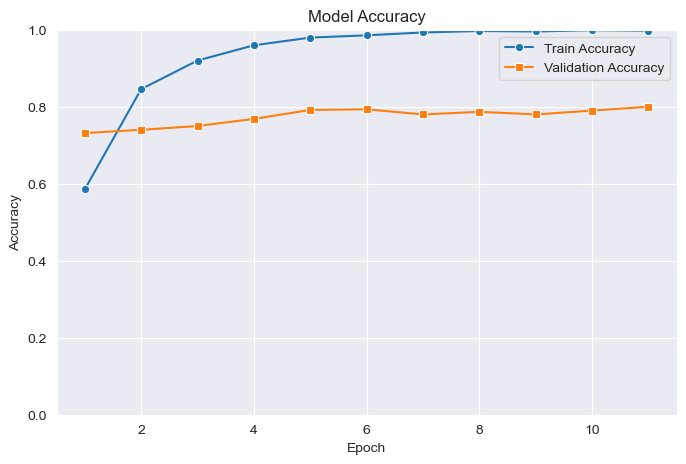

C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\797725475.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train Loss', marker='o', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\797725475.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', marker='s', palette='dark')


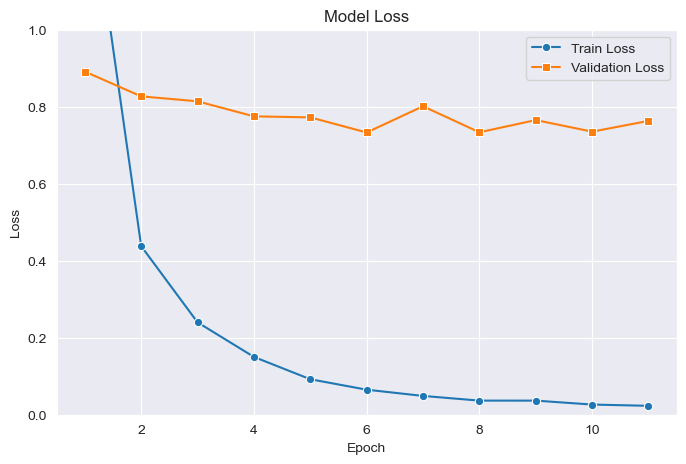

In [ ]:
graficar_modelo(history, score)



## Fine-tuning

In [19]:
history, score , modelo_fine_tuned = entrenar_modelo_fine_tuned(dicc_labels=dicc_labels, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, callbacks_list=callbacks_list)

<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> False
<Conv2D name=block5_conv1, built=True> False
<Conv2D name=block5_conv2, built=True> False
<Conv2D name=block5_conv3, built=True> False
<MaxPooling2D name=block5_pool, built=True> False
<Flatten name=flatten, built=True> False
<Dense name=fc1, built=True> True
<Dense name=fc2, built=True> True
<Dense n

Test loss: 0.9024544358253479
Test accuracy: 0.8224955797195435


C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\563814512.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train Accuracy', marker='o', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\563814512.py:141: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', palette='dark',marker='s')


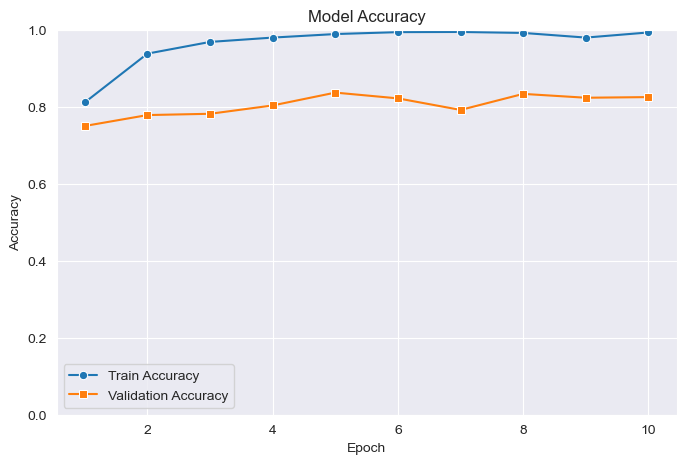

C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\563814512.py:151: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train Loss', marker='o', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\563814512.py:152: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', marker='s', palette='dark')


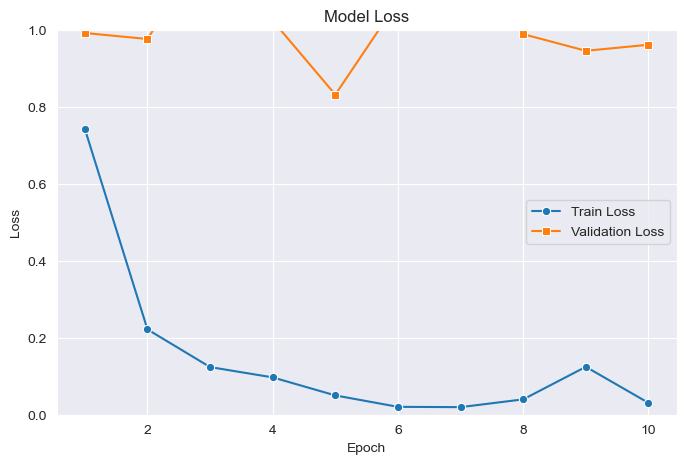

C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\563814512.py:171: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs, y=history.history['val_loss'], label="Validation Loss", marker='o', color='b', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\563814512.py:172: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs, y=history.history['loss'], label="Train Loss", marker='s', color='r', palette='dark')


Test loss: 0.9024544358253479
Test accuracy: 0.8224955797195435


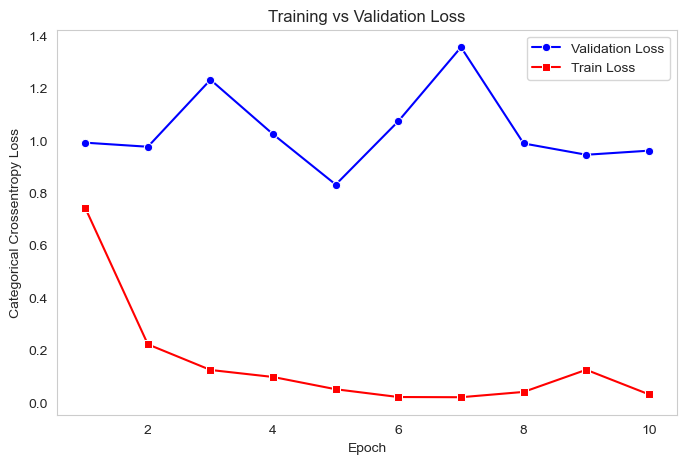

In [21]:
graficar_modelo(history, score)
graficar_modelo2(history, score)

In [25]:
history, score , modelo_fine_tuned  = entrenar_modelo_fine_tuned_25(dicc_labels=dicc_labels, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, callbacks_list=callbacks_list)

<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> False
<Conv2D name=block5_conv1, built=True> False
<Conv2D name=block5_conv2, built=True> False
<Conv2D name=block5_conv3, built=True> False
<MaxPooling2D name=block5_pool, built=True> False
<Flatten name=flatten, built=True> False
<Dense name=fc1, built=True> True
<Dense name=fc2, built=True> True
<Dense n

Test loss: 0.9874867796897888
Test accuracy: 0.8418277502059937


C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\1022896891.py:139: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Train Accuracy', marker='o', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\1022896891.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', palette='dark',marker='s')


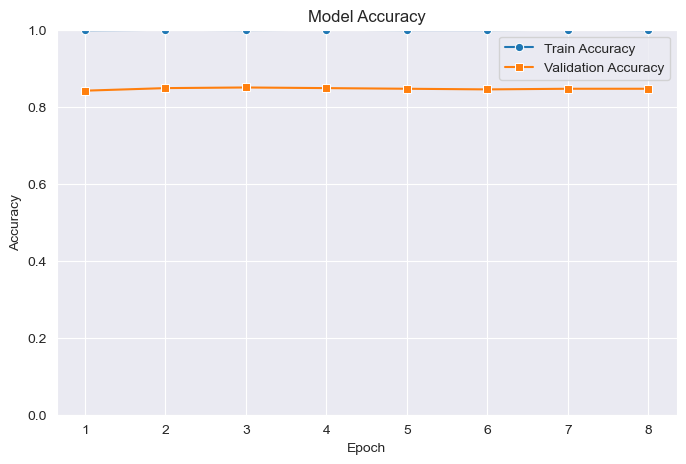

C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\1022896891.py:150: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Train Loss', marker='o', palette='dark')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\1022896891.py:151: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', marker='s', palette='dark')


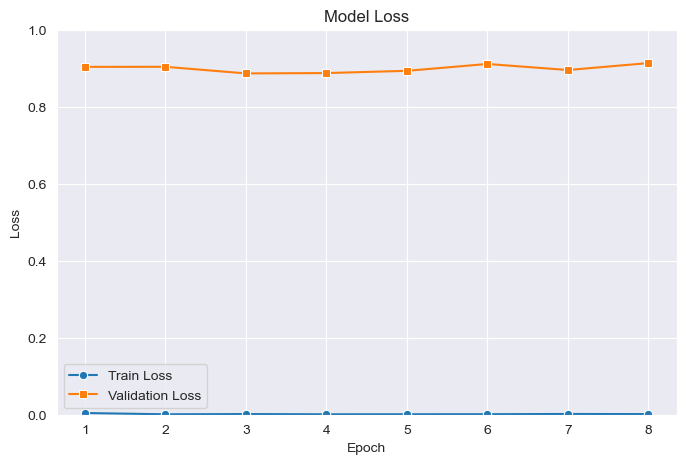

C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\1022896891.py:170: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs, y=history.history['val_loss'], label="Validation Loss", marker='o', color='b', palette='dark')


Test loss: 0.9874867796897888
Test accuracy: 0.8418277502059937


C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\1022896891.py:171: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs, y=history.history['loss'], label="Train Loss", marker='s', color='r', palette='dark')


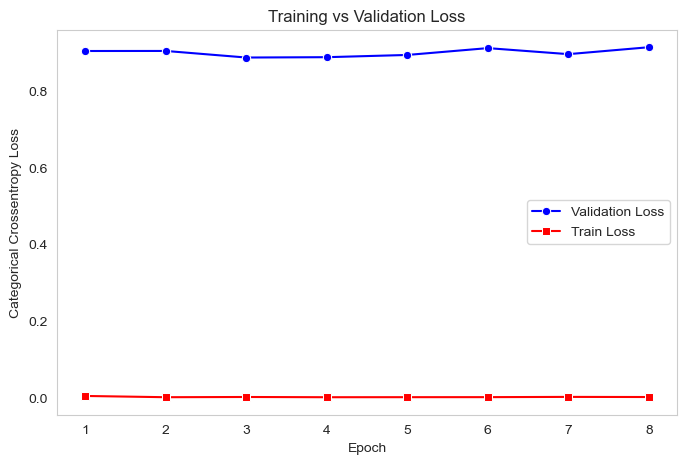

In [26]:
graficar_modelo(history, score)
graficar_modelo2(history, score)

In [22]:
# Instancio los callbacks para el entrenamiento
name_modelo = ''
callbacks_list = []
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,    restore_best_weights=True)
csv_logger = tf.keras.callbacks.CSVLogger(rf'./{name_modelo}.log')
callbacks_list.append(early_stopping)
callbacks_list.append(csv_logger)



## Comparación modelos / Prueba significancia

In [ ]:

""" Se aplica prueba estadística chi-cuadrado de McNemar
   útil para comparar las variables del modelo 1 con todas las capas congeladas
   y el último modelo con fine tuning realizado, en términos de errores discordantes."""

model1 = load_model(filepath="./model.h5") # modelo con todas las capas congeladas
model2 = load_model(filepath="./model_fine_tuned.keras") # modelo con final con fine tuning


preds1 = model1.predict(X_test)
preds2 = model2.predict(X_test)


print("Shape de preds1:", preds1.shape)
print("Shape de preds2:", preds2.shape)
print("Shape de y_test:", y_test.shape)

#Marca la predicción con mayor probabilidad del vector output de la capa de calificación\
    # softmax como la clase predicha.

preds1_class = np.argmax(preds1, axis=1)  
preds2_class = np.argmax(preds2, axis=1)  


y_test_class = y_test 

# b = casos en los que model1 se equivocó pero model2 acertó
b = np.sum((preds1_class != y_test_class) & (preds2_class == y_test_class))
# c = casos en los que model1 acerto pero el model 2 se equivoco.
c = np.sum((preds1_class == y_test_class) & (preds2_class != y_test_class))

table = np.array([[0, b], [c, 0]])  


print("\nTabla de contingencia (b y c):")
print(table)

# Test de McNemar
if b + c == 0:
    print("los modelos son idénticos en sus errores")
elif b + c < 25:
    print ("Se procede con la prueba exacta de McNemar")
    result = mcnemar(table, exact=True)  # `exact=True` Caso para valores chicos

    # Resultados
    print("\nEstadístico de McNemar:", result.statistic)
    print("p-valor:", result.pvalue)

    # Interpretación
    alpha = 0.05
    if result.pvalue < alpha:
        print("Hay una diferencia significativa entre los modelos.")
    else:
        print("No hay una diferencia significativa entre los modelos.")
else:
    print ("Se procede con al aproximación de chi cuadrado")
    result = mcnemar(table, exact=False)  # `exact=True` si los valores son pequeños

    # Resultados
    print("\nEstadístico de McNemar:", result.statistic)
    print("p-valor:", result.pvalue)

    # Interpretación
    alpha = 0.05
    if result.pvalue < alpha:
        print("Hay una diferencia significativa entre los modelos.")
    else:
        print("No hay una diferencia significativa entre los modelos.")

54/54 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step
Shape de preds1: (1707, 24)
Shape de preds2: (1707, 24)
Shape de y_test: (1707,)

Tabla de contingencia (b y c):
[[  0 144]
 [ 99   0]]
Se procede con al aproximación de chi cuadrado

Estadístico de McNemar: 7.967078189300412
p-valor: 0.004763576802836751
Hay una diferencia significativa entre los modelos.


# Clustering

In [ ]:
# Uno las listas de train y test para hacer el clustering, y extraigo las features

ph_preproceded_imgs = np.vstack([X_train, X_test])
ph_labels = np.concatenate([y_train, y_test], axis=0)

""" si se pretendiese recrear el experimento se descomenta la linea siguiente"""

#features = extraer_features(model=modelo_fine_tuned, imagenes_preprocesadas=ph_preproceded_imgs)


In [ ]:
# Guardo las features en un archivo .npy para no tener que volver a extraerlas y\
    # poder trabajar con ellas en el futuro.

#np.save(rf'./features_extracted.npy', features)

features = np.load(rf'./features_extracted.npy')

## Clustering UMAP / DBSCAN cosine

In [20]:
# instancio el algoritmo UMAP
reductor_dimensionalidad = umap.UMAP(n_neighbors=70, min_dist=0.10, n_components=100, metric='cosine', random_state=68)
# aplico el algoritmo UMAP
embedding = reductor_dimensionalidad.fit_transform(features)

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [21]:
# Validación con Coheficiente de Hopkins 
print(hopkins(embedding, embedding.shape[0]))

0.9846589769559952


In [66]:
# Clusterizo con DBSCAN
dbscan = DBSCAN(eps=0.65, min_samples=20)
labels_dbscan = dbscan.fit_predict(embedding)


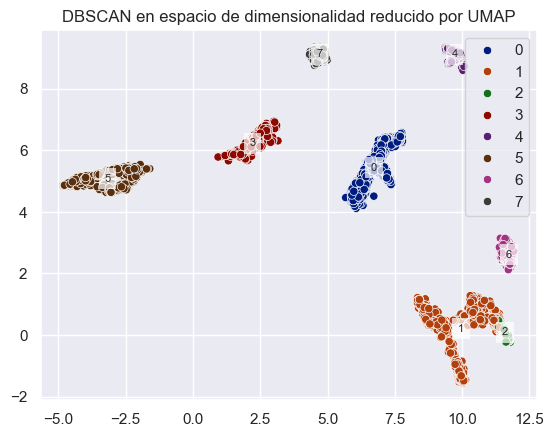

In [72]:
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels_dbscan, palette='dark')
unique_labels = np.unique(labels_dbscan)
for label in unique_labels:
    if label != -1:  # para ignorar el ruido si DBSCAN lo detecta
        cluster_points = embedding[labels_dbscan == label]
        centroid = cluster_points.mean(axis=0)
        plt.text(centroid[0], centroid[1], str(label), fontsize=8, ha='center', va='center', 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('DBSCAN en espacio de dimensionalidad reducido por UMAP')
plt.show()

In [18]:
import seaborn as sns

In [19]:
sns.color_palette

<function seaborn.palettes.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)>

In [20]:
sns.set_style('darkgrid') 

In [22]:
# Validación Van Dongen 
ct_db = pd.crosstab(ph_labels, labels_dbscan)
print ("Van Dongen es de ""%0.4f." % vanDongen(ct_db))

Van Dongen es de 0.3366.


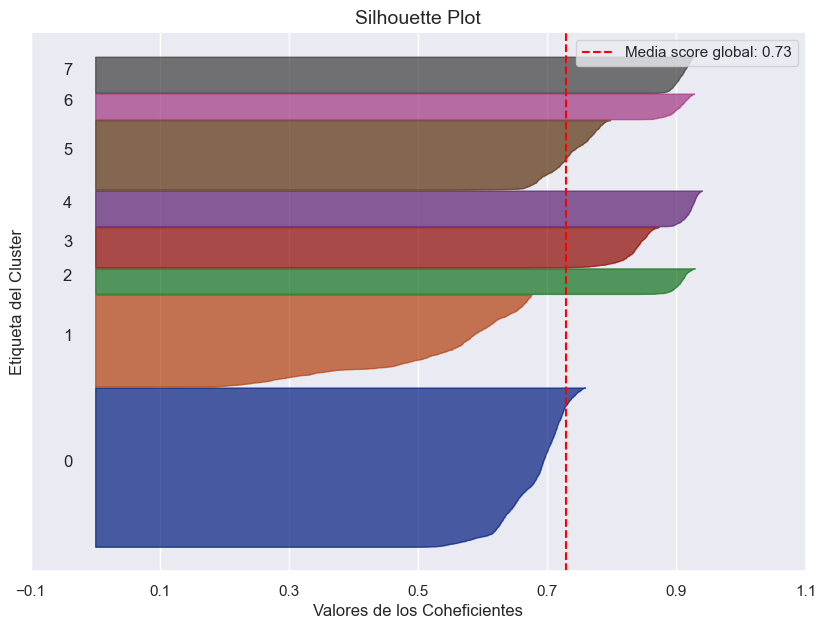

In [73]:
# Validación con Silhouette para DBSCAN
silhouette_vals = silhouette_samples(embedding, labels_dbscan)
graficar_silhouette(embedding, labels_dbscan, silhouette_vals)


### Clustering UMAP / K-Medoids (PAM)

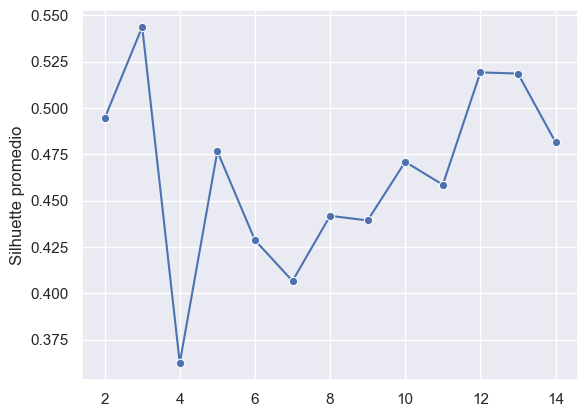

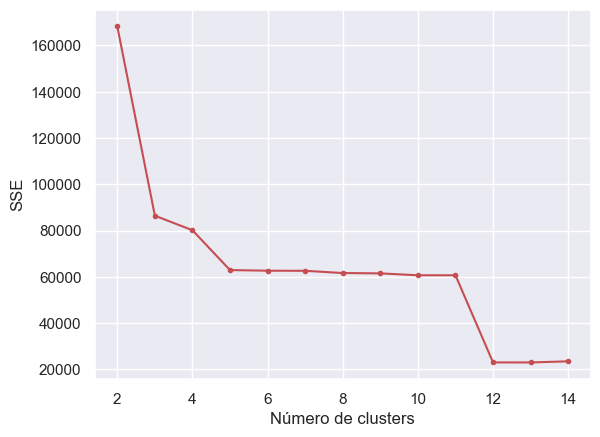

In [77]:
dist_matrix_umap = pairwise_distances(embedding, metric='euclidean')

range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(dist_matrix_umap)

    silh.append(silhouette_score(dist_matrix_umap,KM.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM,dist_matrix_umap))

sns.set_style('darkgrid')
sns.lineplot(x=range_k, y=silh, marker='o')

plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.xlabel('Número de clusters')
plt.show()


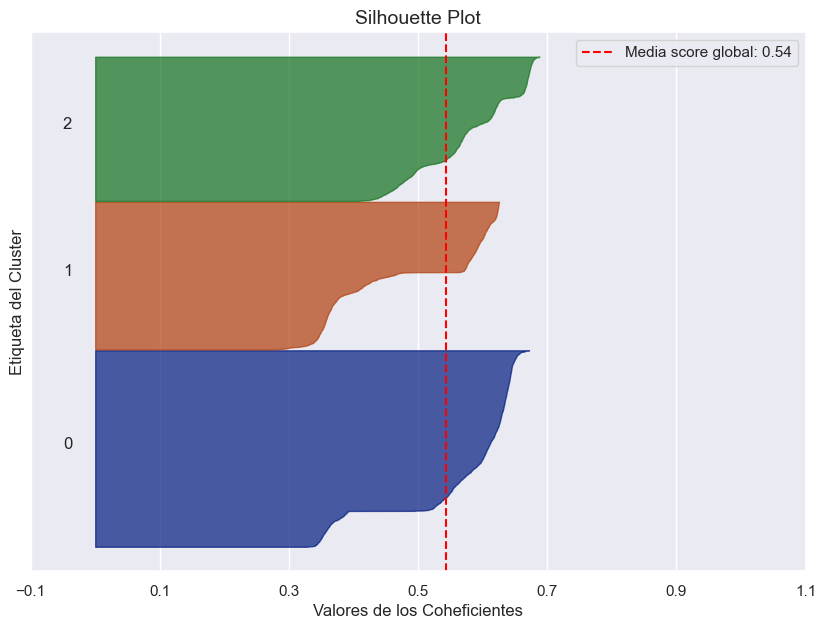

In [ ]:
# Teniendo en consideración el número de clusters idóneo hacemos el clustering con KMedoids

KM = KMedoids(n_clusters=3,metric='precomputed',init='heuristic').fit(dist_matrix_umap)
silhouette_vals = silhouette_samples(embedding, KM.labels_)
graficar_silhouette(embedding, KM.labels_, silhouette_vals)

In [80]:
# Validación con Van Dongen 
ct_pam = pd.crosstab(ph_labels, KM.labels_)
print("Van Dongen es de ""%0.4f." % vanDongen(ct_pam))


Van Dongen es de 0.5258.


## Clustering PCA + Jerárquico

### Tendencia al clustering con Coeficiente De Hopkin

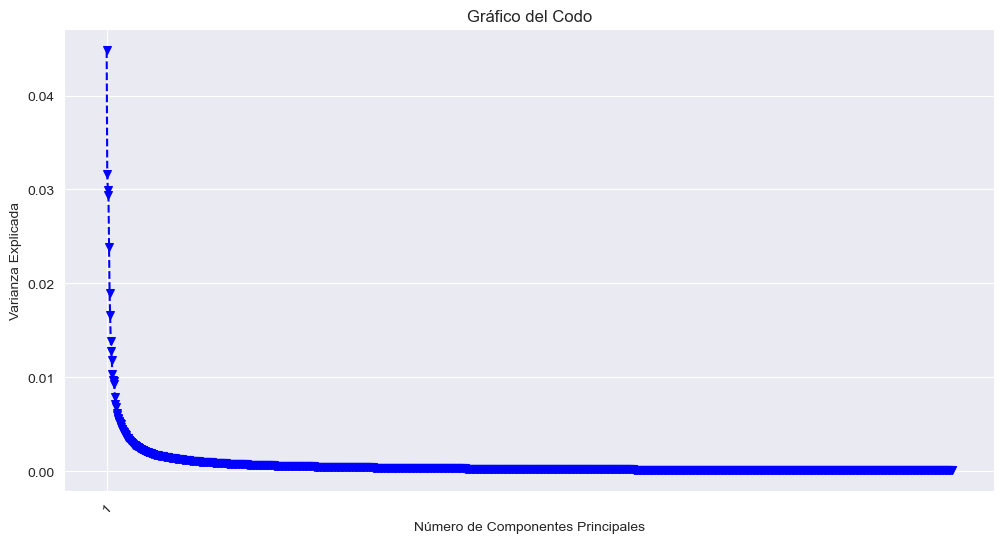

In [ ]:
features_standarized = StandardScaler().fit_transform(features)
pca = PCA(n_components=0.95)
pca.fit(features_standarized)
features_pca = pca.fit_transform(features_standarized) 
explained_variance = pca.explained_variance_ratio_
print (explained_variance.shape)

df_explained_variance = pd.DataFrame({
    'Número de Componentes Principales': range(1, len(explained_variance) + 1),
    'Varianza Explicada': explained_variance
})

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))  # Aumenta el tamaño del gráfico
sns.lineplot(
    data=df_explained_variance,
    x='Número de Componentes Principales',
    y='Varianza Explicada',
    marker='v',
    linestyle='--',
    color='blue',             # color para la línea y el borde
    markerfacecolor='blue',   # color de relleno de los marcadores
    markeredgecolor='blue'    # color del borde de los marcadores
)

plt.title('Gráfico del Codo')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')

# Reducir cantidad de ticks en el eje X
plt.xticks(np.arange(1, len(explained_variance) + 1, step=max(1, len(explained_variance))), rotation=45)

plt.grid(True)
plt.show()

pca_embeddings = pca.components_

In [39]:
print(hopkins(features_pca))

0.9123309474279783


In [40]:
dist_matrix_pca = pairwise_distances(features_pca, metric='euclidean')
dist_matrix_pca.shape

(5688, 5688)

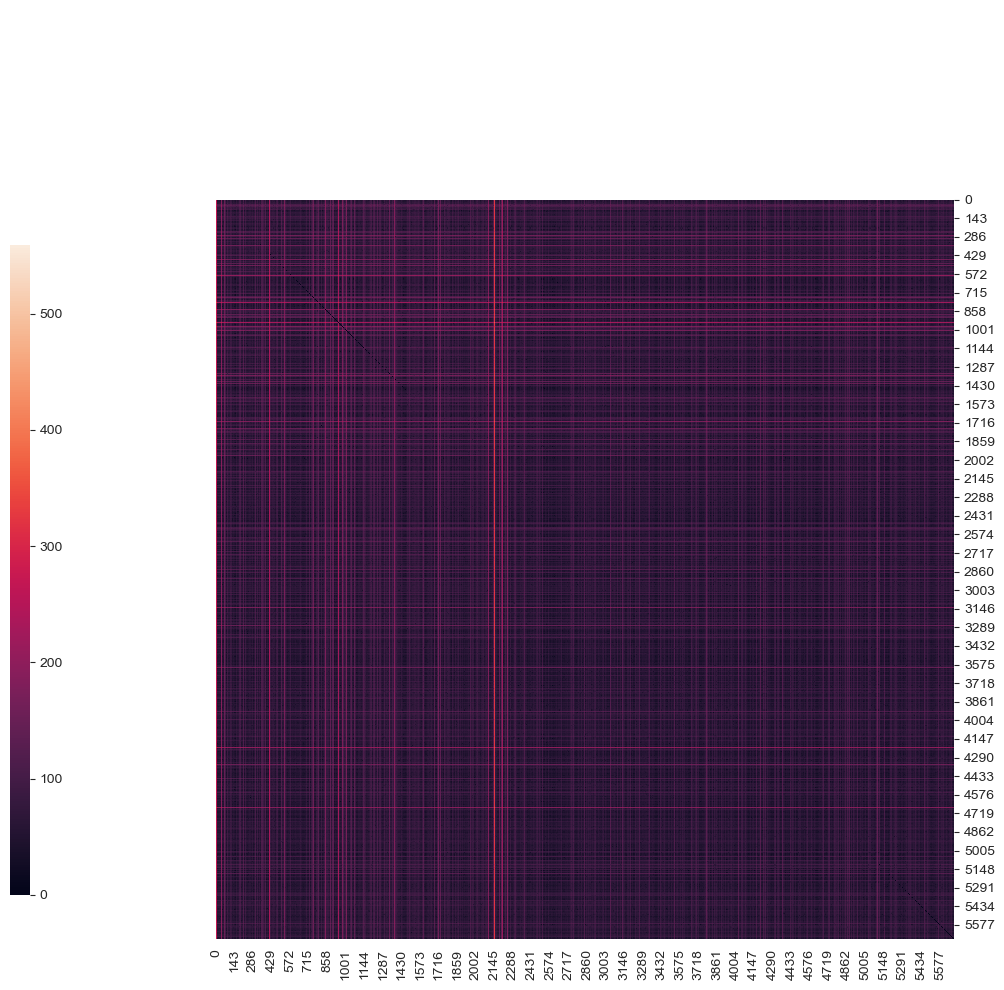

In [41]:
sns.clustermap(dist_matrix_pca,row_cluster=False,col_cluster=False, cbar_pos=(0, .1, .02, .65))

In [42]:
is_symmetric = np.allclose(dist_matrix_pca, dist_matrix_pca.T)
print("¿Es simétrica?", is_symmetric)


¿Es simétrica? True


In [43]:
print(np.any(dist_matrix_pca > 0))

True


In [44]:
dist_matrix_pca = (dist_matrix_pca + dist_matrix_pca.T) / 2
dist_matrix_pca.shape


(5688, 5688)

In [45]:

dist_condensed = squareform(dist_matrix_pca)
dist_condensed.shape


(16173828,)

In [46]:
metodos = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
for z in metodos:
    Z = linkage(dist_matrix_pca, method=z)
    c, coph_dists = cophenet(Z, squareform(dist_matrix_pca))
    print(f"Coeficiente Cofenético para {z}: {c}")
    

C:\Users\Admin\AppData\Local\Temp\ipykernel_13732\222887884.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=z)


Coeficiente Cofenético para single: 0.7326925636259639
Coeficiente Cofenético para complete: 0.8809915033225301
Coeficiente Cofenético para average: 0.8698493868651087
Coeficiente Cofenético para weighted: 0.7771809837102818
Coeficiente Cofenético para centroid: 0.8861768205269324
Coeficiente Cofenético para median: 0.7586677522390814
Coeficiente Cofenético para ward: 0.5605832572968157


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\912960233.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method='centroid')


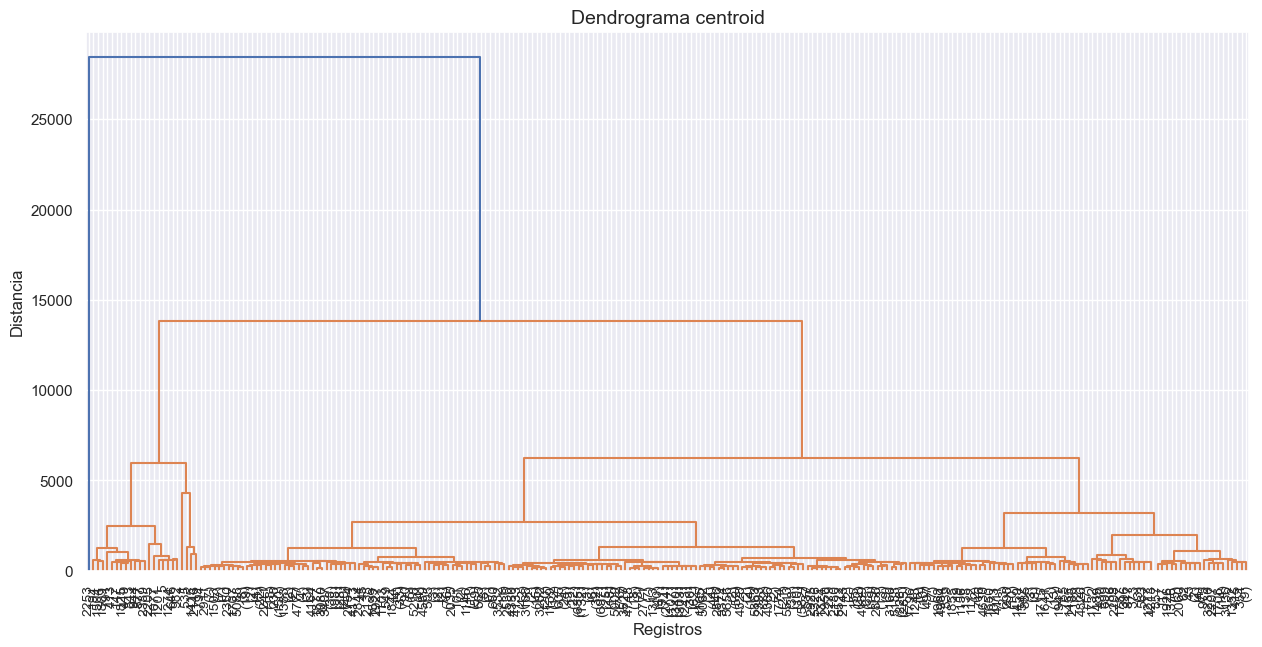

In [305]:

# Armo la matriz Z con el método de enlace 'centroid' que es el que mayor coeficiente cofenético tiene

"""Los métodos “Ward” y “Centroid” necesitan
distancias euclídeas (o sea cuadráticas)
para producir resultados que sean
significativos y consistentes. Pero a su vez la distancia euclideana
resulta ineficiente en espacios de alta dimensionalidad"""

# Genera la jerarquía de clustering
Z = linkage(dist_matrix_pca, method='centroid')

# Calcula el coeficiente cophenético
c, _ = cophenet(Z, squareform(dist_matrix_pca))

# Genera el dendrograma con mejoras
plt.figure(figsize=(15, 7))
plt.title(f'Dendrograma centroid' , fontsize=14)
plt.xlabel('Registros', fontsize=12)
plt.ylabel('Distancia', fontsize=12)

# Truncar el dendrograma para mejor visualización
dn = dendrogram(Z, truncate_mode='level', p=10, 
                leaf_rotation=90, leaf_font_size=10, 
                color_threshold=np.max(Z[:, 2]) * 0.7)  # Ajuste de colores


plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13732\1082039672.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method='centroid')


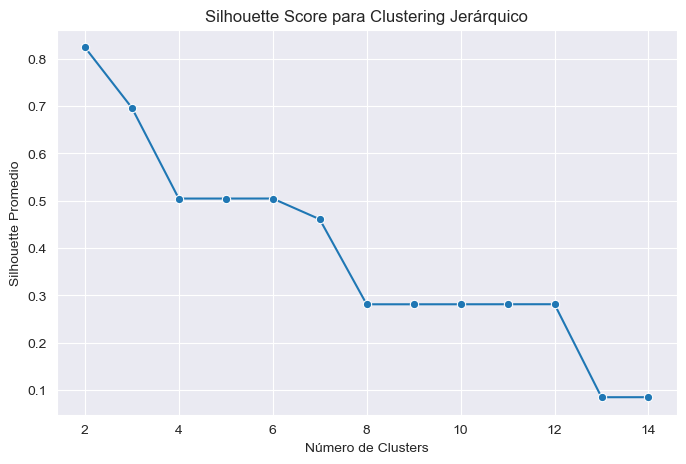

In [47]:


range_k = [i for i in range(2, 15)]
silh = []
Z = linkage(dist_matrix_pca, method='centroid')  

for k in range_k:

    labels_jerarquico = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(features_pca, labels_jerarquico)  
    silh.append(score)


sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.lineplot(x=range_k, y=silh, marker='o')
plt.ylabel('Silhouette Promedio')
plt.xlabel('Número de Clusters')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13732\3036554225.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method='centroid')  # O usa 'complete' si prefieres


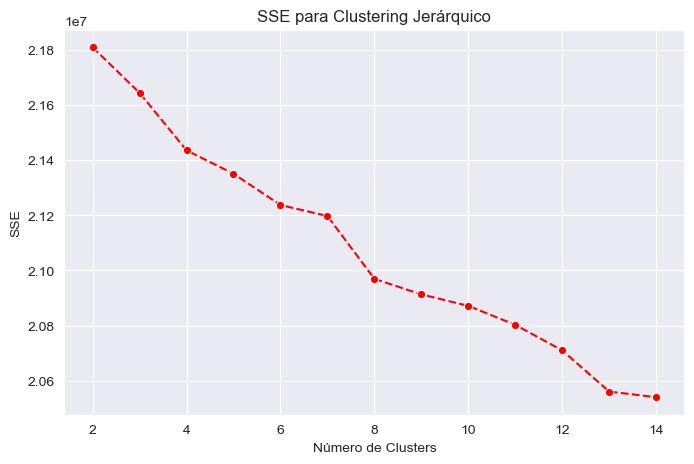

In [48]:
range_k = [i for i in range(2, 15)]
sse = []

# Aplicar clustering jerárquico
Z = linkage(dist_matrix_pca, method='centroid')  # O usa 'complete' si prefieres

for k in range_k:
    # Obtener etiquetas de cluster para cada k
    labels_jerarquico = fcluster(Z, k, criterion='maxclust')
    
    # Calcular la SSE manualmente
    sse_k = 0
    for cluster in np.unique(labels_jerarquico):
        # Obtener puntos del cluster
        cluster_points = features_pca[labels_jerarquico == cluster]
        
        # Calcular centroide del cluster
        centroide = np.mean(cluster_points, axis=0)
        
        # Calcular suma de errores cuadrados dentro del cluster
        sse_k += np.sum((cluster_points - centroide) ** 2)
    
    sse.append(sse_k)

# Graficar SSE
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.lineplot(x=range_k, y=sse, marker='o', color='red', linestyle='--')
plt.ylabel('SSE')
plt.xlabel('Número de Clusters')
plt.title('SSE para Clustering Jerárquico')
plt.show()


In [ ]:
sil_vals = silhouette_samples(features_pca, labels_jerarquico, metric='euclidean')
sil_avg = silhouette_score(features_pca, labels_jerarquico, metric='euclidean')



C:\Users\Admin\AppData\Local\Temp\ipykernel_13732\1755542227.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method='centroid')  # O usa 'complete' si prefieres


Silhouette promedio: 0.6965757 para corte en 3


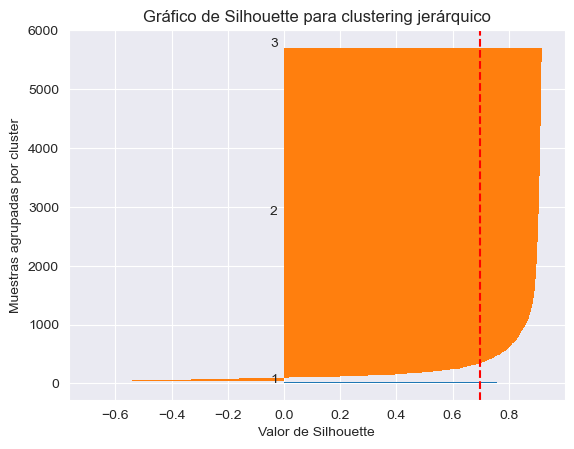

Silhouette promedio: 0.504681 para corte en 4


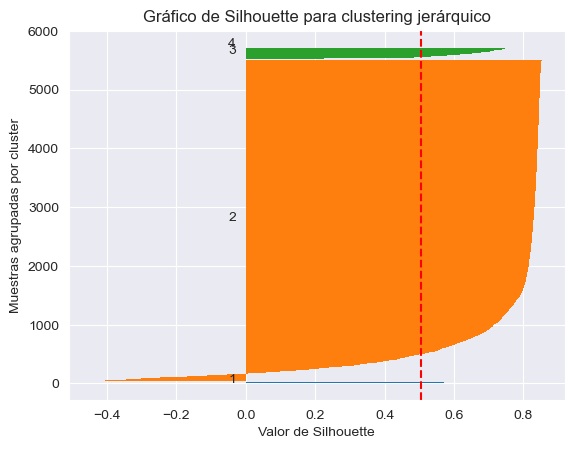

Silhouette promedio: 0.5046959 para corte en 5


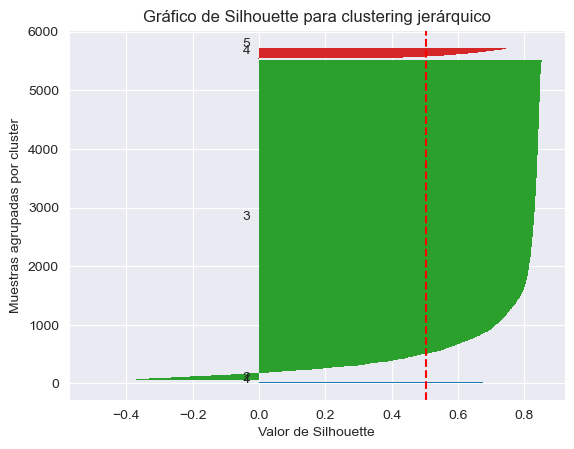

Silhouette promedio: 0.5047413 para corte en 6


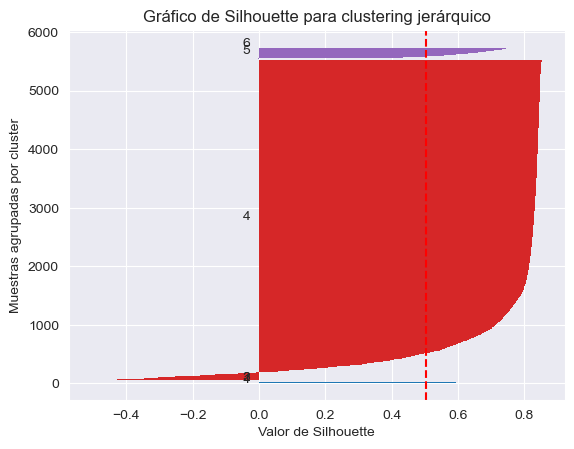

Silhouette promedio: 0.4610076 para corte en 7


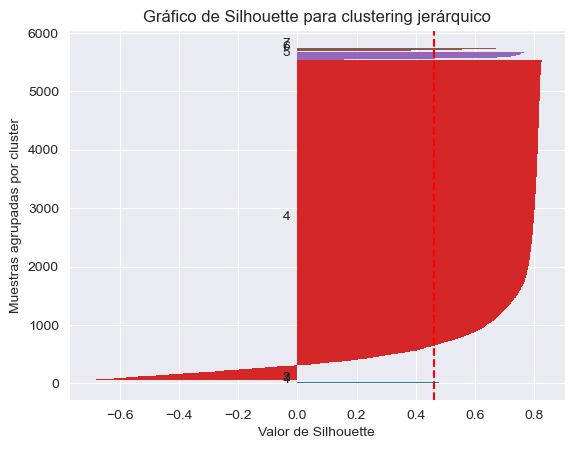

Silhouette promedio: 0.28135154 para corte en 8


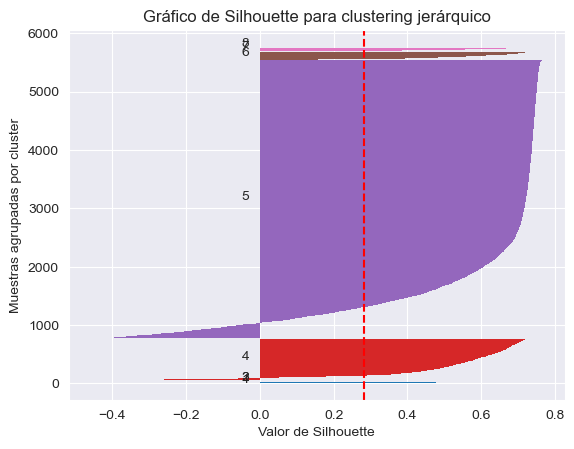

Silhouette promedio: 0.28135312 para corte en 9


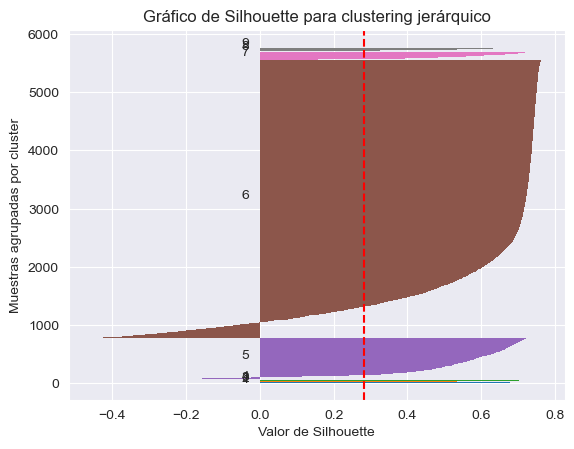

Silhouette promedio: 0.2813913 para corte en 10


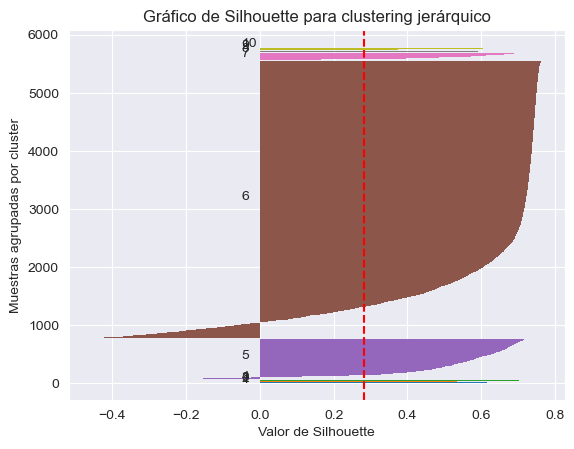

Silhouette promedio: 0.28143403 para corte en 11


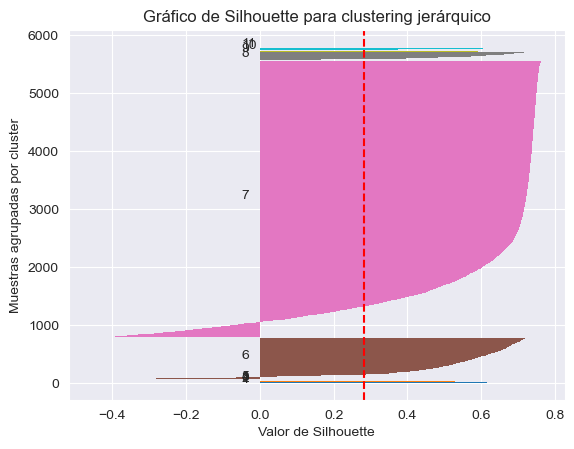

Silhouette promedio: 0.28148958 para corte en 12


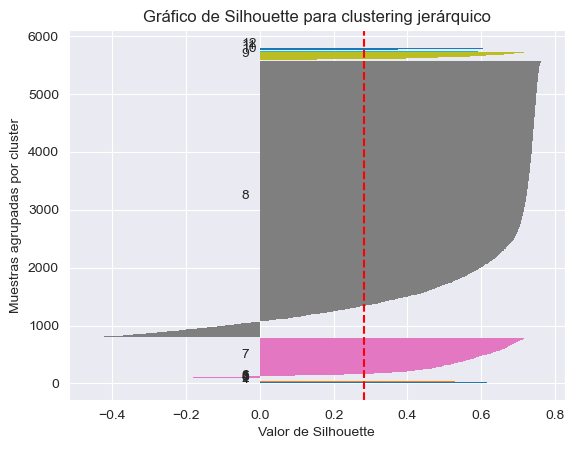

Silhouette promedio: 0.08506812 para corte en 13


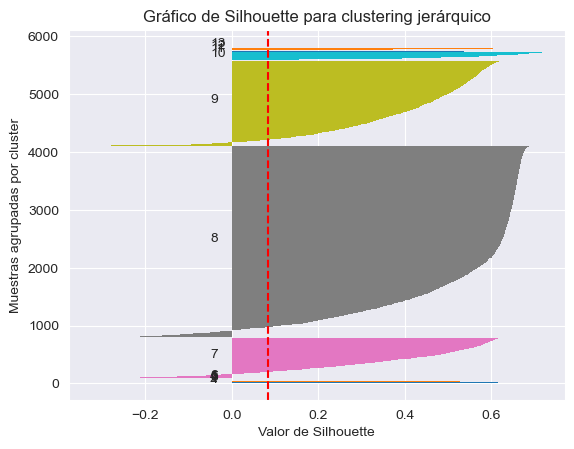

Silhouette promedio: 0.0851262 para corte en 14


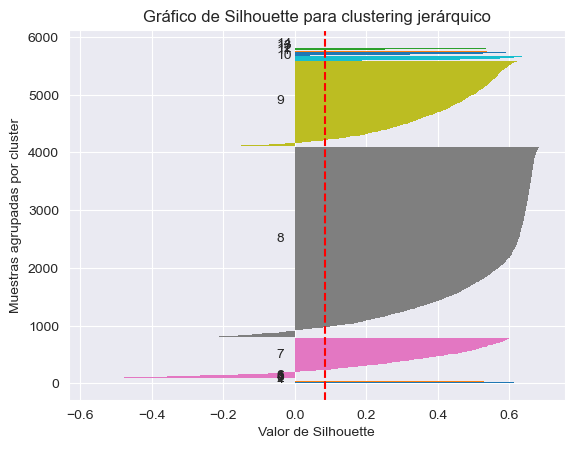

Silhouette promedio: 0.0857203 para corte en 15


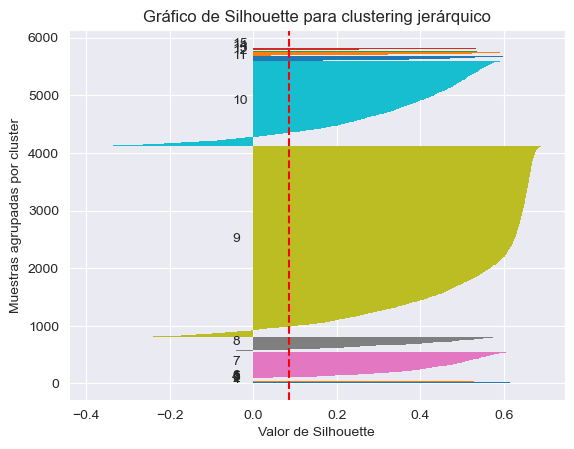

Silhouette promedio: 0.08572262 para corte en 16


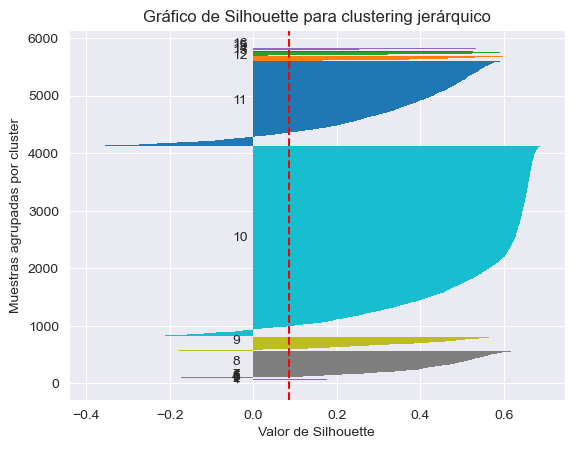

Silhouette promedio: 0.085744955 para corte en 17


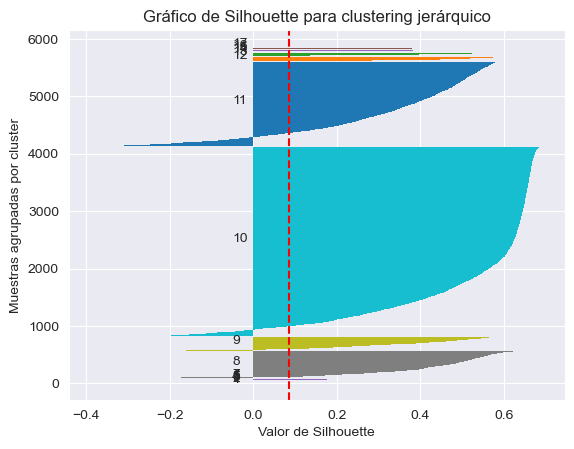

Silhouette promedio: 0.085788675 para corte en 18


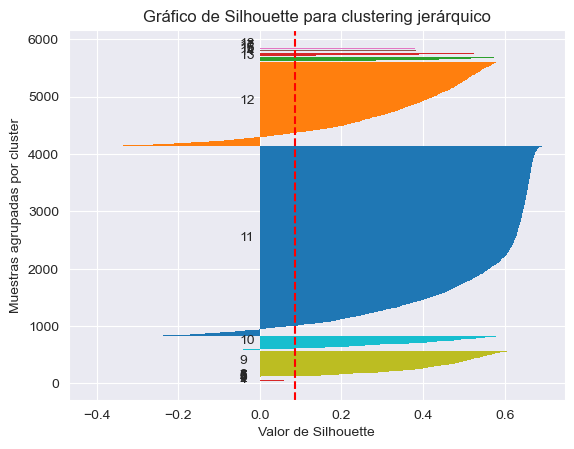

Silhouette promedio: 0.08587166 para corte en 19


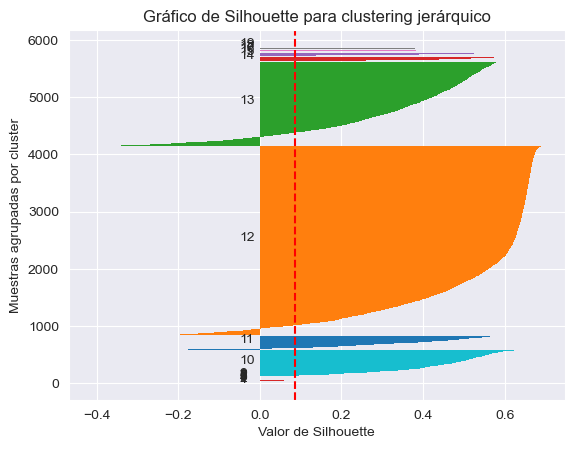

Silhouette promedio: 0.08589196 para corte en 20


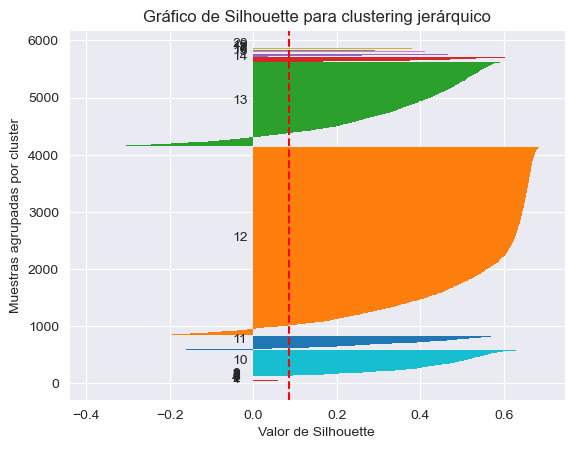

Silhouette promedio: 0.08594193 para corte en 21


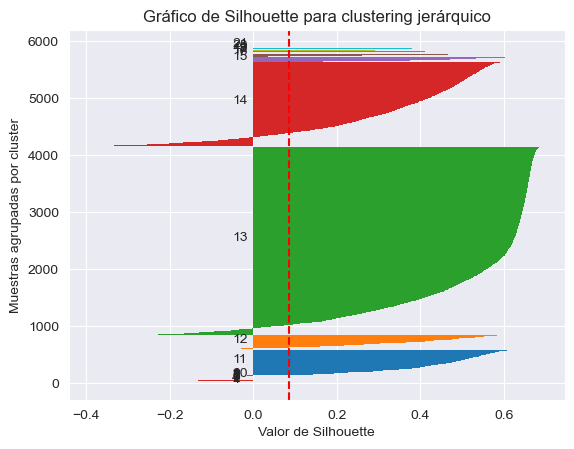

Silhouette promedio: 0.085951105 para corte en 22


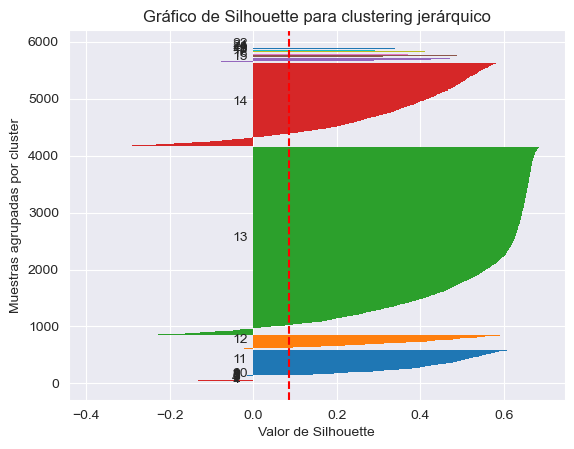

In [49]:

silhoutte_scores_jeraquico = []
unico = pd.unique(ph_labels)
Z = linkage(dist_matrix_pca, method='centroid')  # O usa 'complete' si prefieres

for i in np.arange(3,max(unico) ):

    
    labels_jerarquico = fcluster(Z, i, criterion='maxclust')
    sil_vals = silhouette_samples(dist_matrix_pca, labels_jerarquico, metric='euclidean')
    sil_avg = silhouette_score(features_pca, labels_jerarquico, metric='euclidean')
    print("Silhouette promedio:", sil_avg, "para corte en", i)
    silhoutte_scores_jeraquico.append(sil_avg)
    n_clusters = len(np.unique(labels_jerarquico))
    y_lower = 10
    for i, cluster_id in enumerate(np.unique(labels_jerarquico)):
        cluster_sil_vals = sil_vals[labels_jerarquico == cluster_id]
        cluster_sil_vals.sort()
        size_cluster = cluster_sil_vals.shape[0]
        y_upper = y_lower + size_cluster
        plt.barh(range(y_lower, y_upper),
                 cluster_sil_vals,
                 height=1.0,
                 edgecolor='none')
        plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster_id))
        y_lower = y_upper + 10
    plt.axvline(x=sil_avg, color="red", linestyle="--")
    plt.xlabel("Valor de Silhouette")
    plt.ylabel("Muestras agrupadas por cluster")
    plt.title("Gráfico de Silhouette para clustering jerárquico")
    plt.show()

### Probando otra matriz de distancia

¿Es simétrica? True
True


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\412269066.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=z)


Coeficiente Cofenético para single: 0.2457183599866048
Coeficiente Cofenético para complete: 0.6286647041100174
Coeficiente Cofenético para average: 0.6832161832432541
Coeficiente Cofenético para weighted: 0.6345008077254922
Coeficiente Cofenético para centroid: 0.6296702251661548
Coeficiente Cofenético para median: 0.48104776601898264
Coeficiente Cofenético para ward: 0.6127618673048767
average


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\412269066.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=criterion)


Silhouette promedio: 0.21843128 para corte en 3 con distancia average


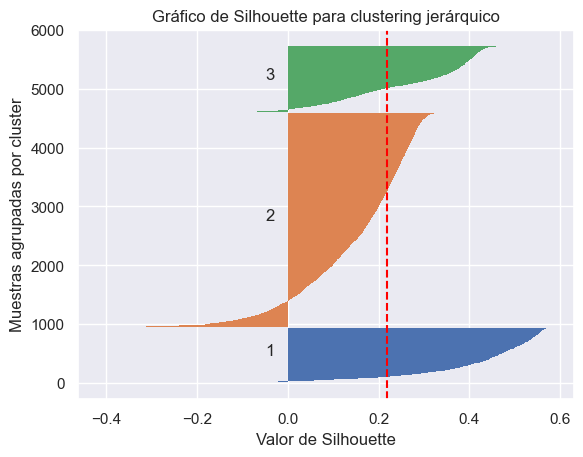

Silhouette promedio: 0.21263668 para corte en 4 con distancia average


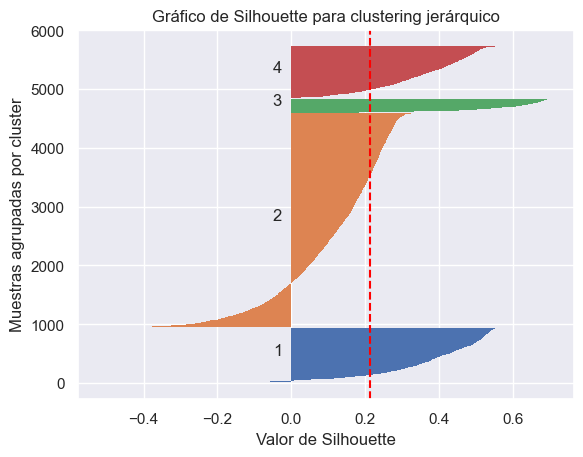

Silhouette promedio: 0.24719164 para corte en 5 con distancia average


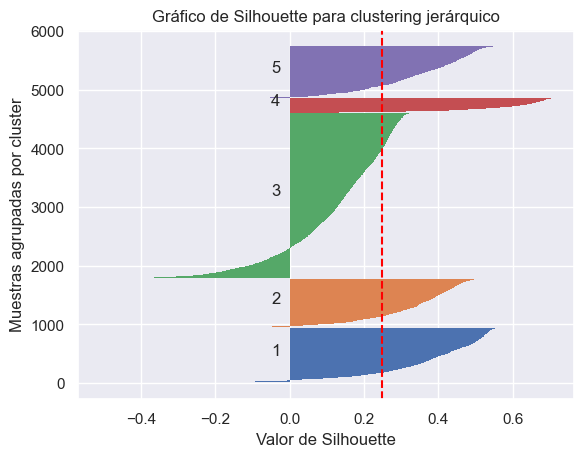

Silhouette promedio: 0.24911065 para corte en 6 con distancia average


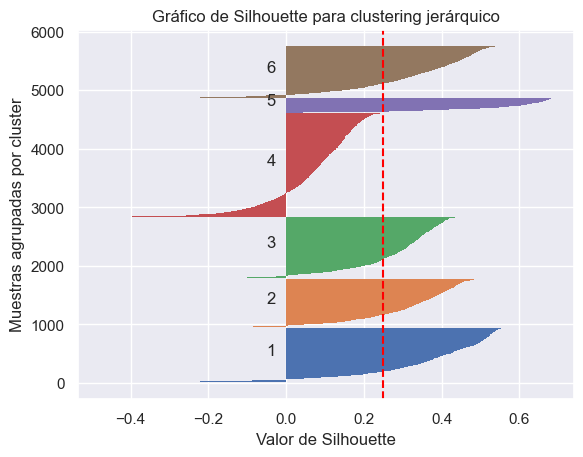

Silhouette promedio: 0.2518794 para corte en 7 con distancia average


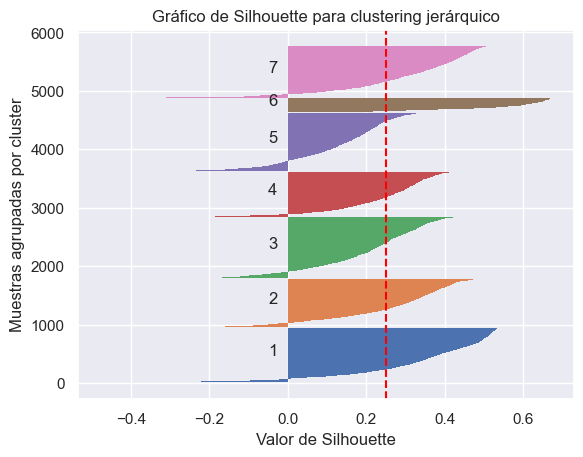

Silhouette promedio: 0.2534548 para corte en 8 con distancia average


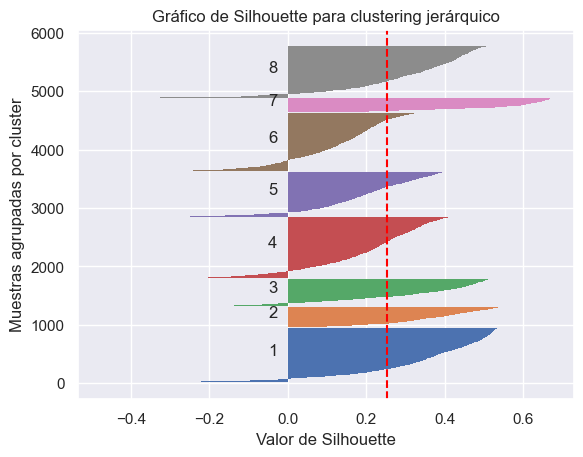

Silhouette promedio: 0.24262679 para corte en 9 con distancia average


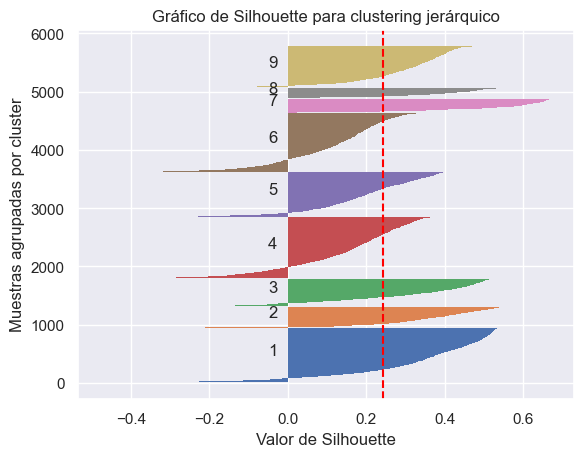

Silhouette promedio: 0.25037476 para corte en 10 con distancia average


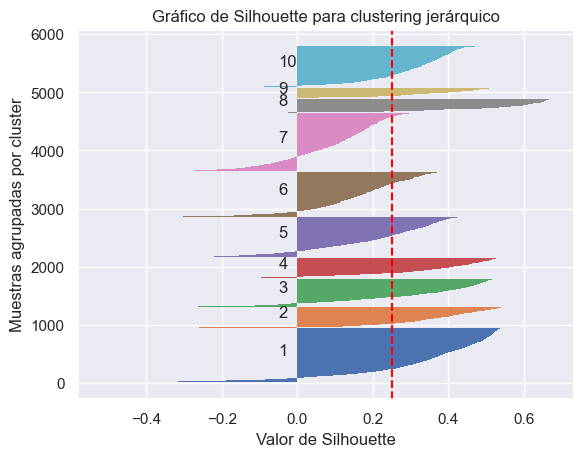

Silhouette promedio: 0.2516797 para corte en 11 con distancia average


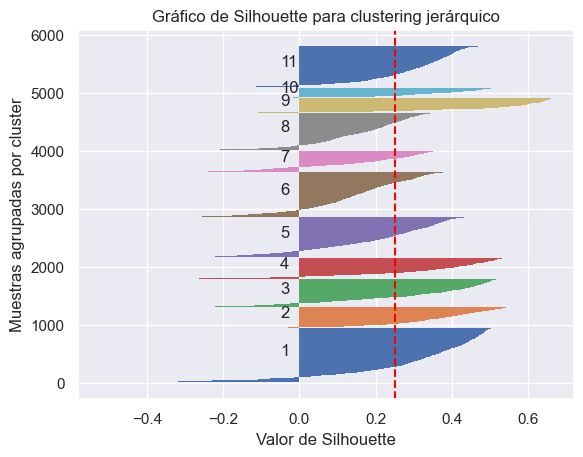

Silhouette promedio: 0.24093193 para corte en 12 con distancia average


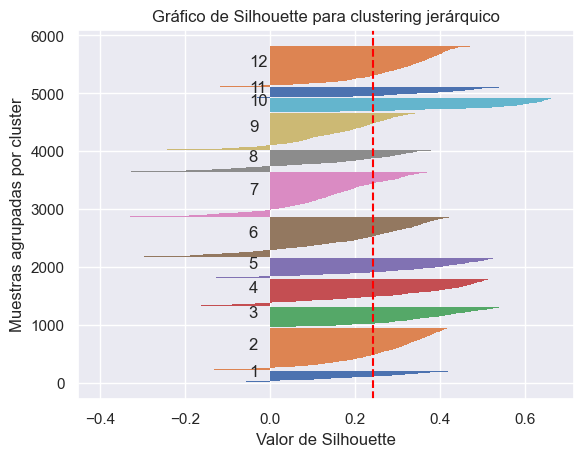

Silhouette promedio: 0.24570505 para corte en 13 con distancia average


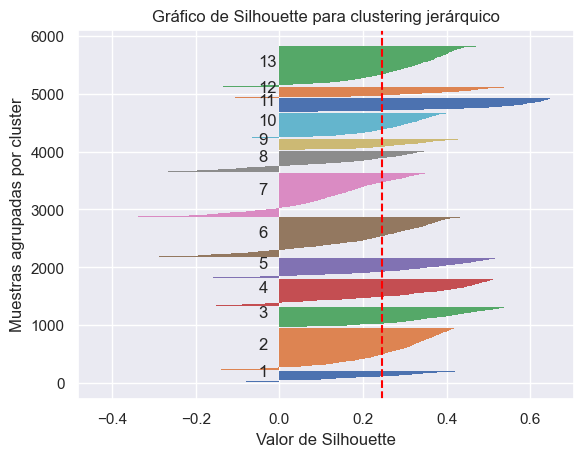

Silhouette promedio: 0.25057265 para corte en 14 con distancia average


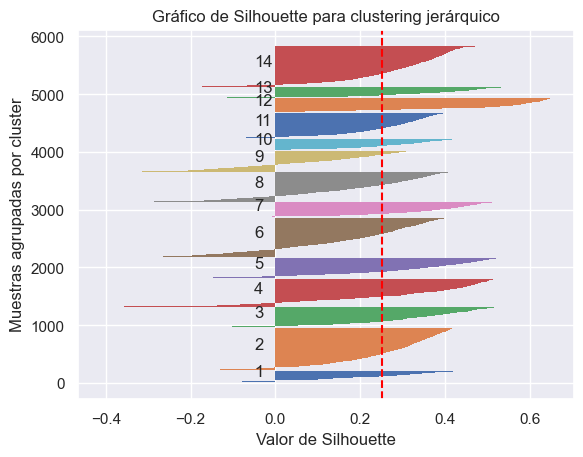

Silhouette promedio: 0.26814848 para corte en 15 con distancia average


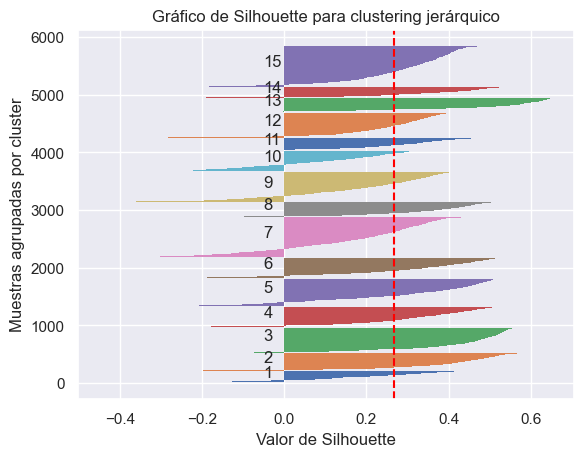

Silhouette promedio: 0.26871493 para corte en 16 con distancia average


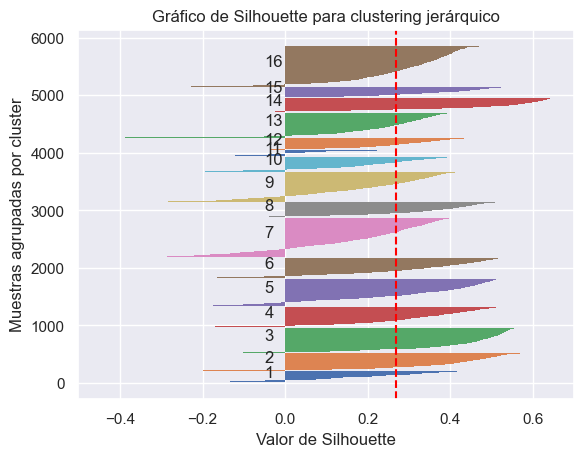

Silhouette promedio: 0.26444346 para corte en 17 con distancia average


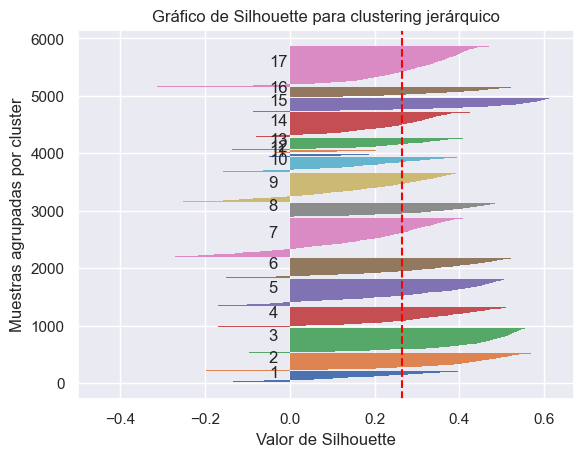

Silhouette promedio: 0.26955023 para corte en 18 con distancia average


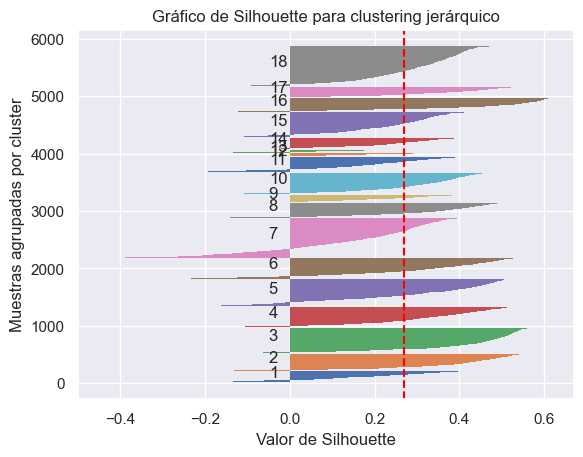

Silhouette promedio: 0.27650085 para corte en 19 con distancia average


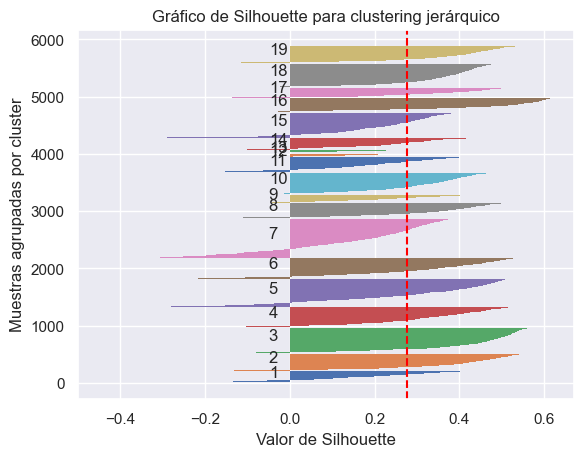

Silhouette promedio: 0.27960566 para corte en 20 con distancia average


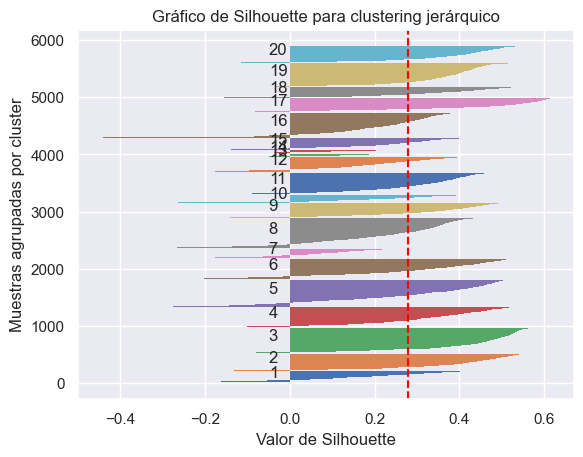

Silhouette promedio: 0.27467933 para corte en 21 con distancia average


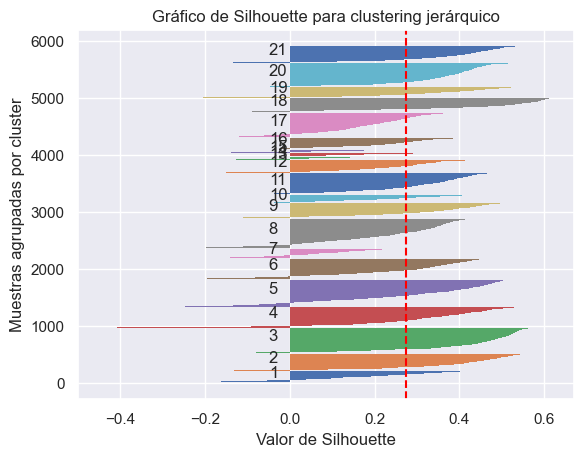

Silhouette promedio: 0.27091295 para corte en 22 con distancia average


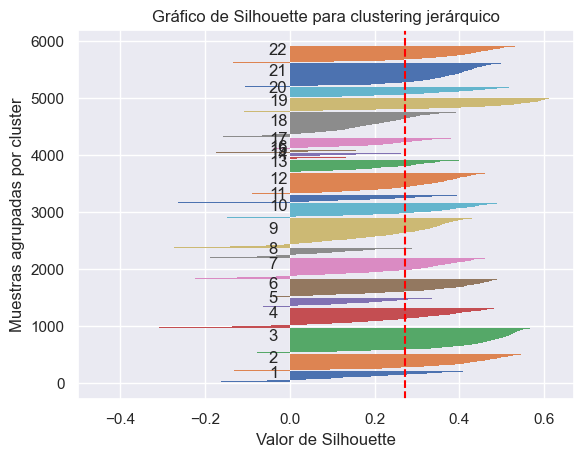

¿Es simétrica? True
True


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\412269066.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=z)


Coeficiente Cofenético para single: 0.6885048973824475
Coeficiente Cofenético para complete: 0.6618104002122133
Coeficiente Cofenético para average: 0.7446646033044892
Coeficiente Cofenético para weighted: 0.598977822366889
Coeficiente Cofenético para centroid: 0.7234905171684833
Coeficiente Cofenético para median: 0.6290386062141686
Coeficiente Cofenético para ward: 0.38902884409624616
average


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\412269066.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=criterion)


Silhouette promedio: 0.8389811939908485 para corte en 3 con distancia average


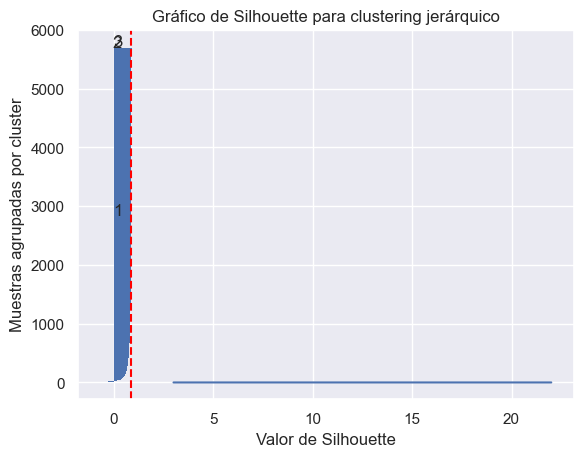

Silhouette promedio: 0.5803835063618651 para corte en 4 con distancia average


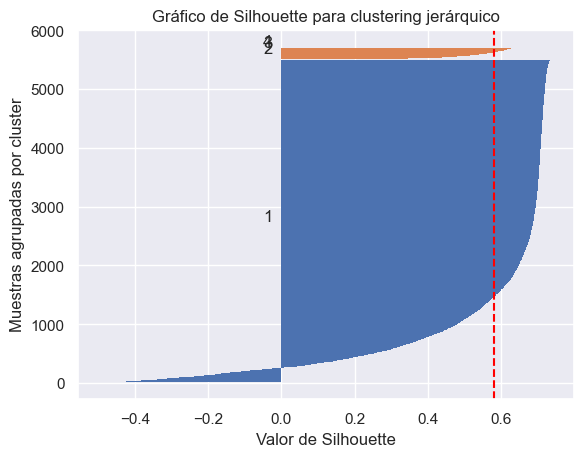

Silhouette promedio: 0.5368625235634302 para corte en 5 con distancia average


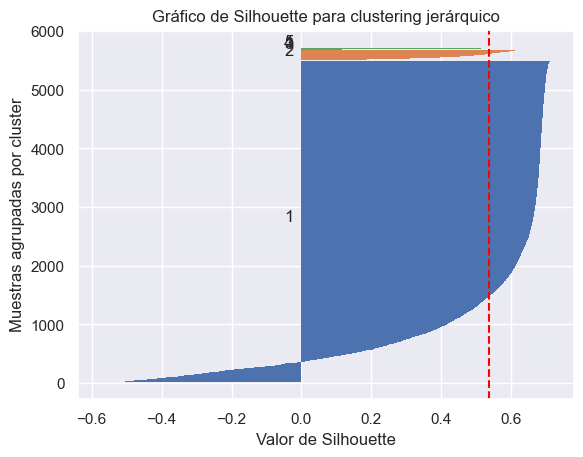

Silhouette promedio: 0.5353500735913768 para corte en 6 con distancia average


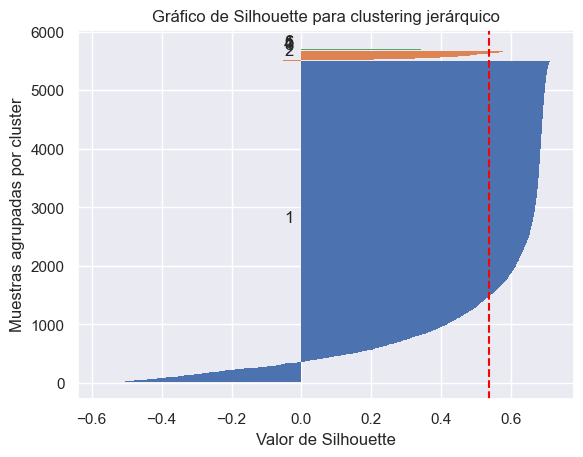

Silhouette promedio: 0.38145536431048493 para corte en 7 con distancia average


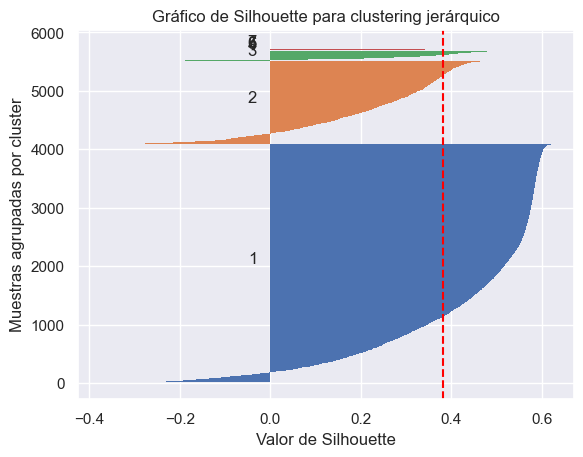

Silhouette promedio: 0.3811046984876132 para corte en 8 con distancia average


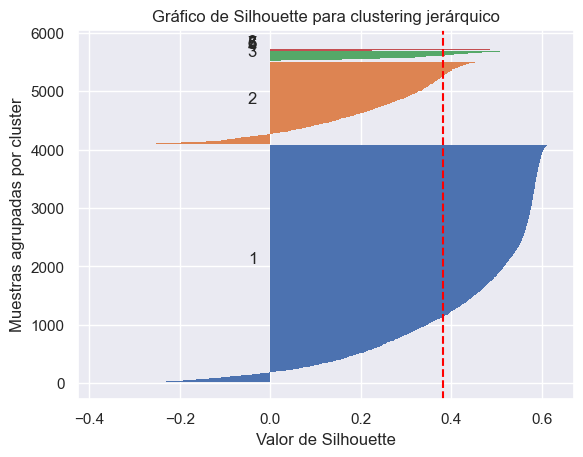

Silhouette promedio: 0.3718685262841912 para corte en 9 con distancia average


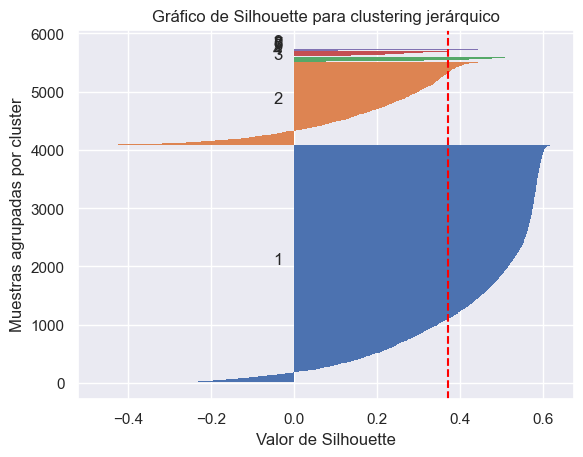

Silhouette promedio: 0.34226945293638955 para corte en 10 con distancia average


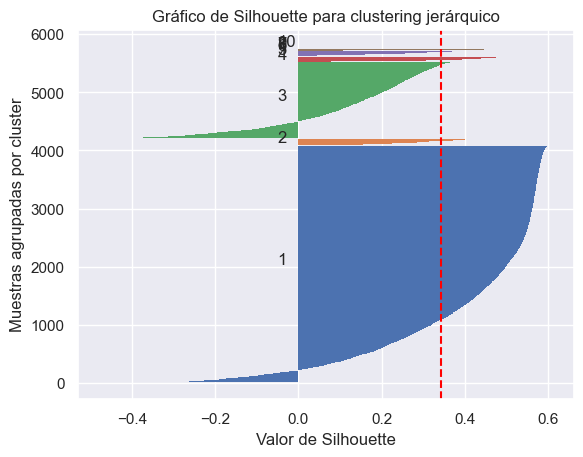

Silhouette promedio: 0.3420102760557507 para corte en 11 con distancia average


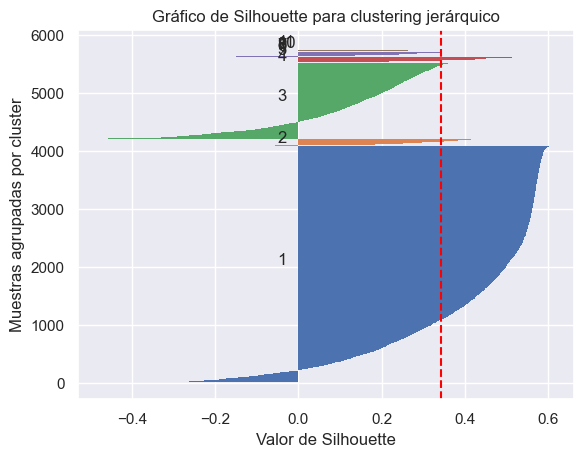

Silhouette promedio: 0.341952495963599 para corte en 12 con distancia average


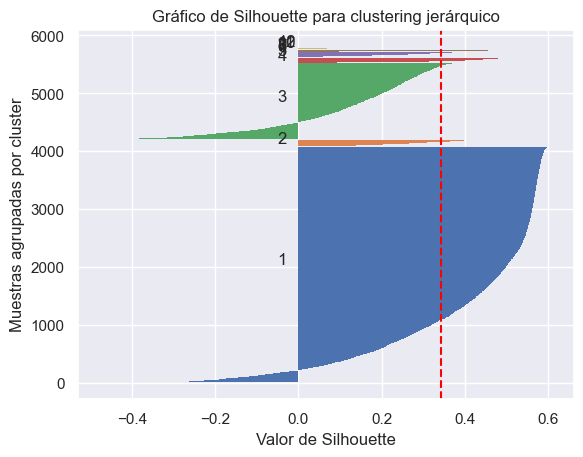

Silhouette promedio: 0.34157814614321447 para corte en 13 con distancia average


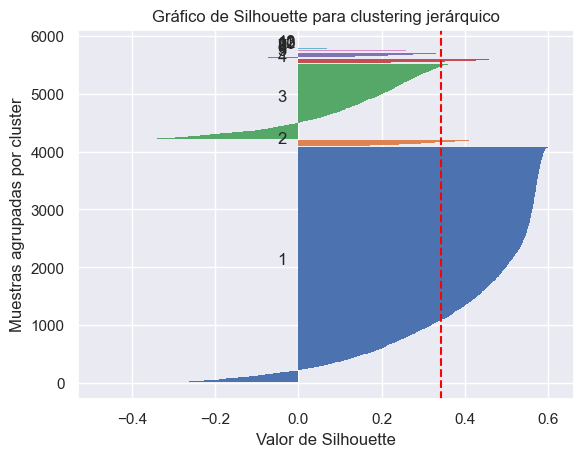

Silhouette promedio: 0.32847582550907434 para corte en 14 con distancia average


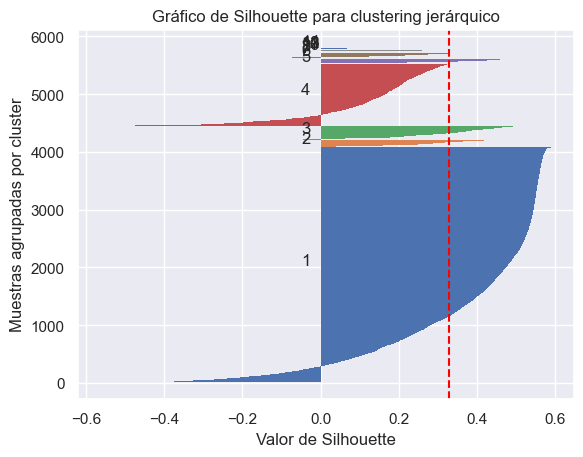

Silhouette promedio: 0.3284682204529406 para corte en 15 con distancia average


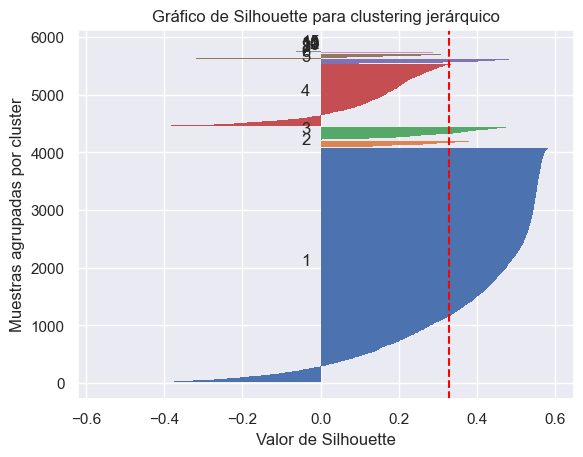

Silhouette promedio: 0.3284853080272012 para corte en 16 con distancia average


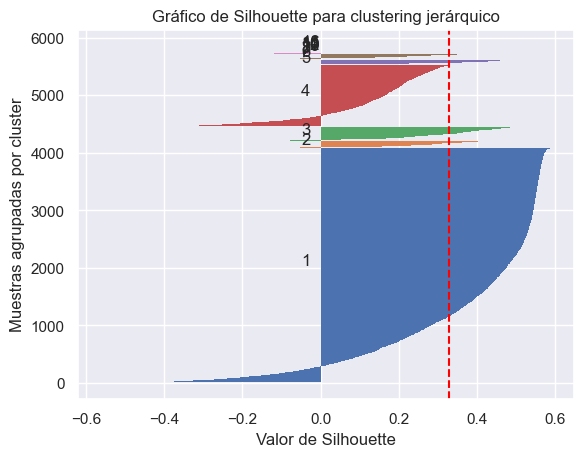

Silhouette promedio: 0.308073465716506 para corte en 17 con distancia average


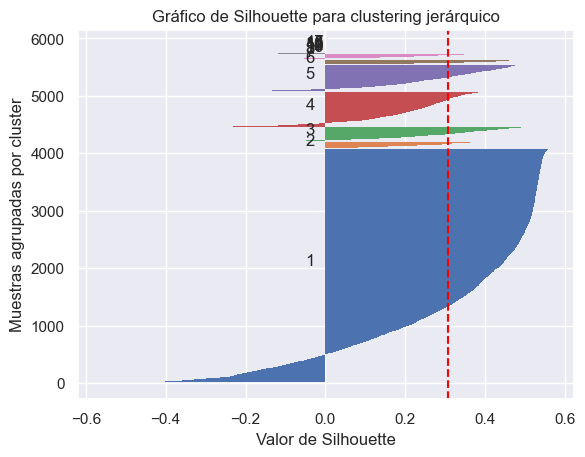

Silhouette promedio: 0.30721993287870003 para corte en 18 con distancia average


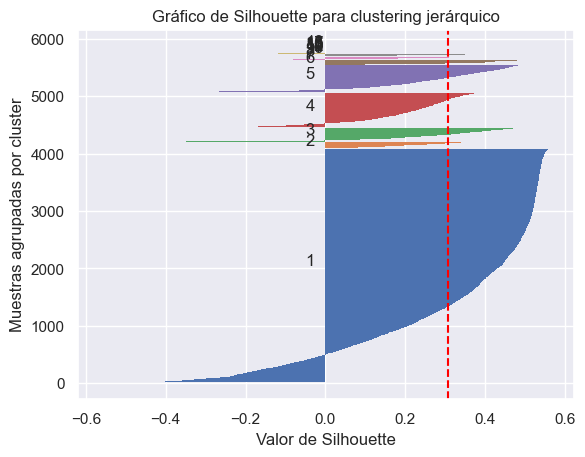

Silhouette promedio: 0.30711715889604 para corte en 19 con distancia average


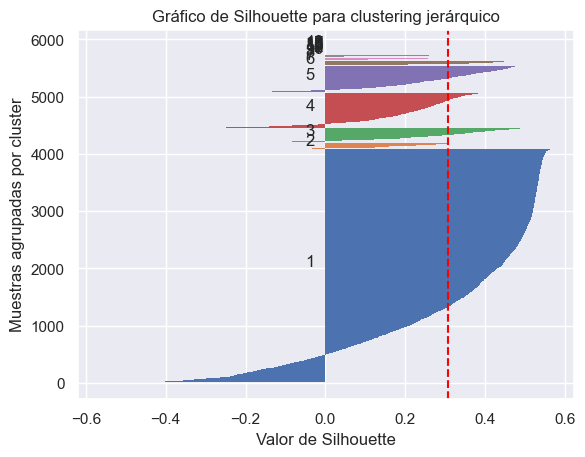

Silhouette promedio: 0.30646611791948525 para corte en 20 con distancia average


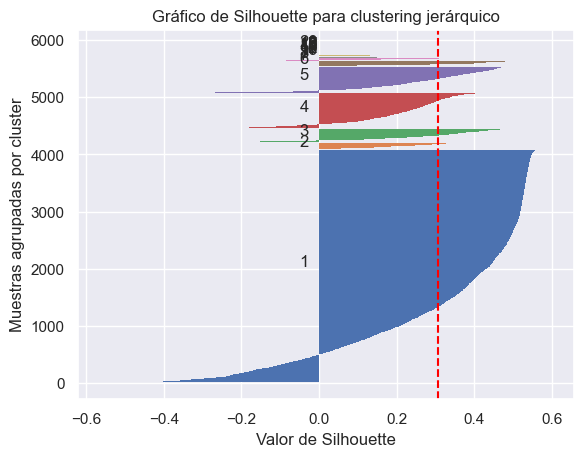

Silhouette promedio: 0.3041735524065584 para corte en 21 con distancia average


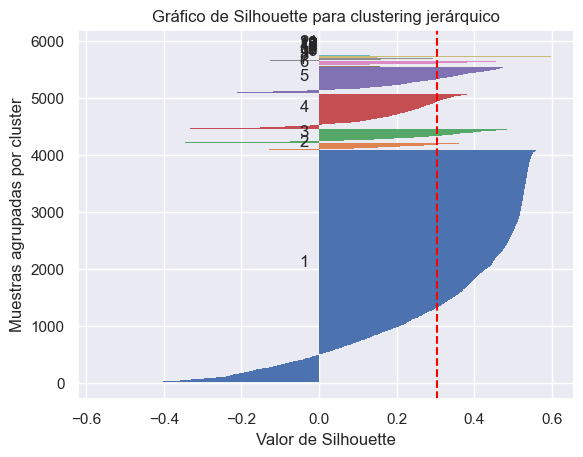

Silhouette promedio: 0.30428425586280783 para corte en 22 con distancia average


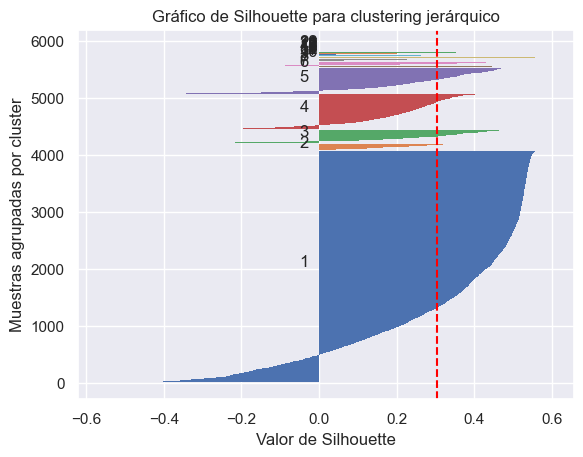

¿Es simétrica? True
True


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\412269066.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=z)


Coeficiente Cofenético para single: 0.7261224718174061
Coeficiente Cofenético para complete: 0.8630984985508874
Coeficiente Cofenético para average: 0.8551652627870916
Coeficiente Cofenético para weighted: 0.8180841285581144
Coeficiente Cofenético para centroid: 0.8566662354240896
Coeficiente Cofenético para median: 0.8324518715868623
Coeficiente Cofenético para ward: 0.6544809733901726
complete


C:\Users\Admin\AppData\Local\Temp\ipykernel_22420\412269066.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix_pca, method=criterion)


Silhouette promedio: 0.716042459239682 para corte en 3 con distancia complete


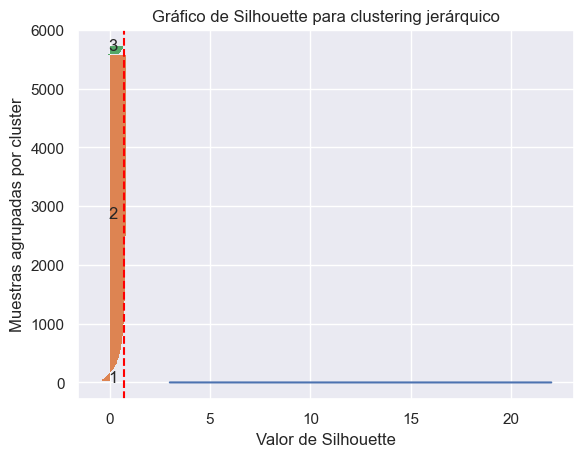

Silhouette promedio: 0.6903675013907972 para corte en 4 con distancia complete


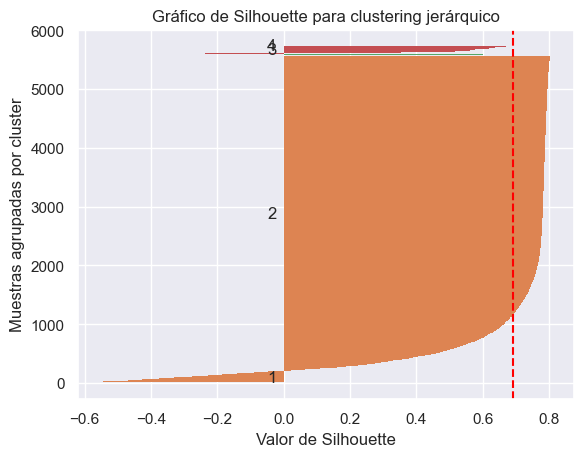

Silhouette promedio: 0.6901604783812909 para corte en 5 con distancia complete


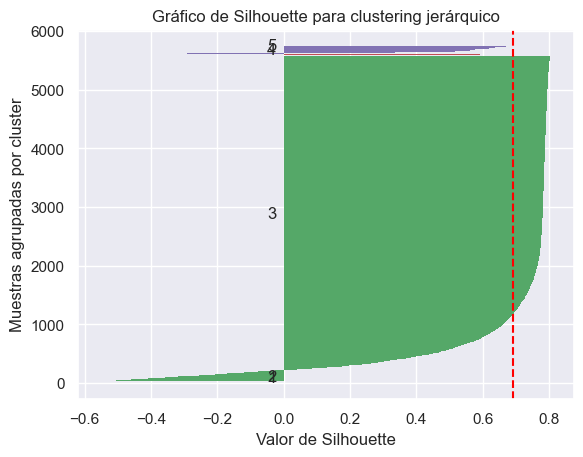

Silhouette promedio: 0.5355902205295693 para corte en 6 con distancia complete


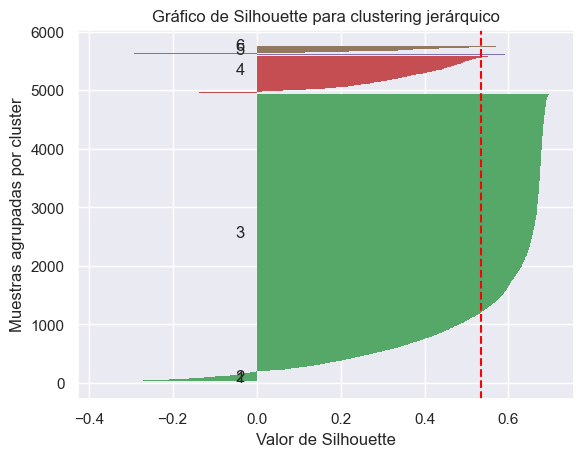

Silhouette promedio: 0.5301211003197924 para corte en 7 con distancia complete


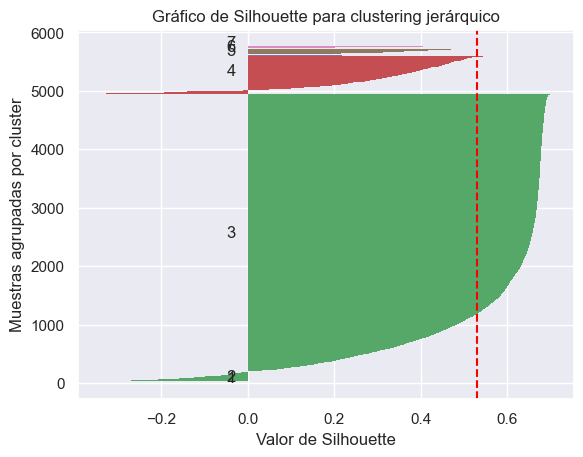

Silhouette promedio: 0.46811575094864855 para corte en 8 con distancia complete


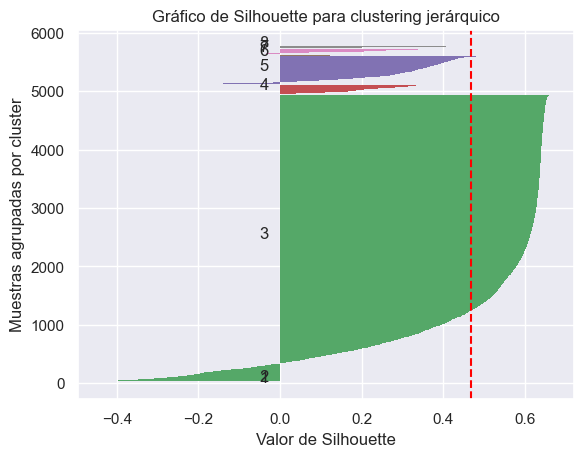

Silhouette promedio: 0.4675390644398895 para corte en 9 con distancia complete


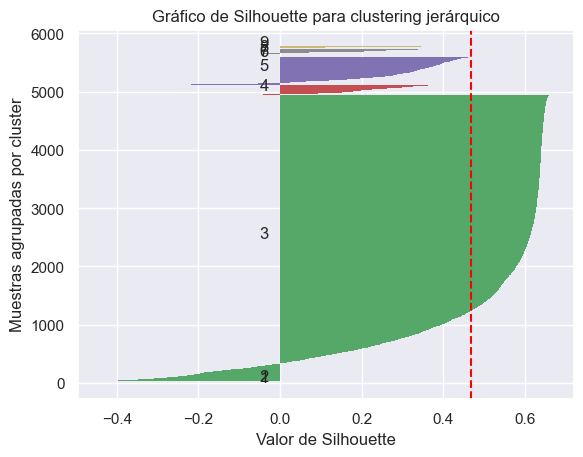

Silhouette promedio: 0.4675260734748454 para corte en 10 con distancia complete


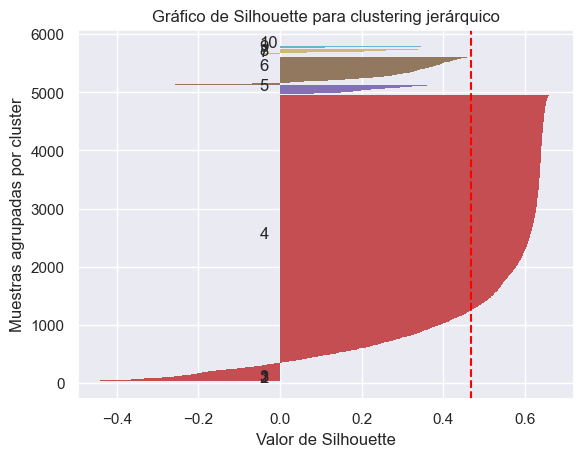

Silhouette promedio: 0.4669032104566722 para corte en 11 con distancia complete


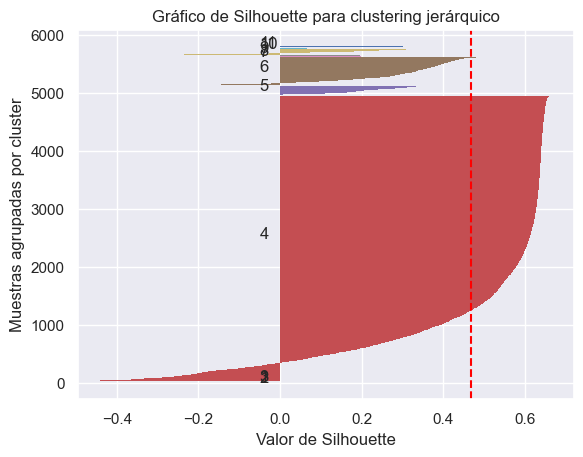

Silhouette promedio: 0.46524144581660903 para corte en 12 con distancia complete


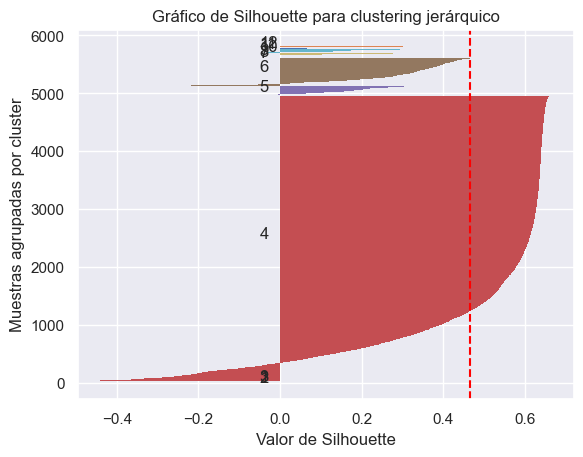

Silhouette promedio: 0.316828454790406 para corte en 13 con distancia complete


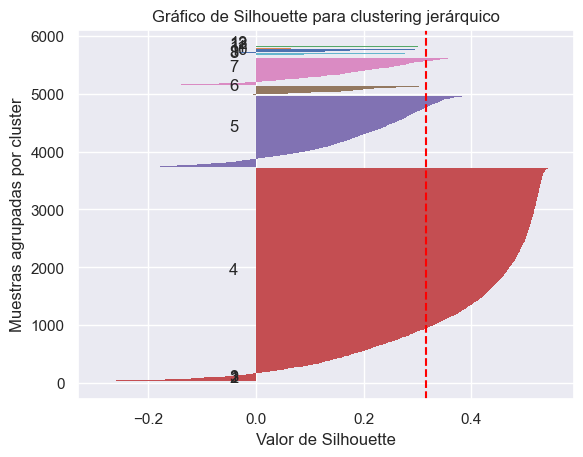

Silhouette promedio: 0.3170191579999254 para corte en 14 con distancia complete


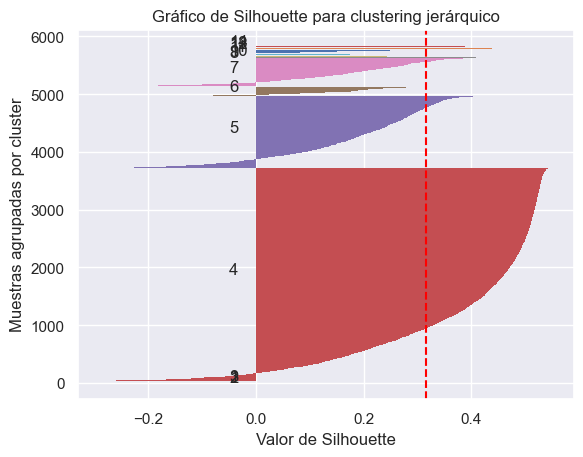

Silhouette promedio: 0.3038674617943824 para corte en 15 con distancia complete


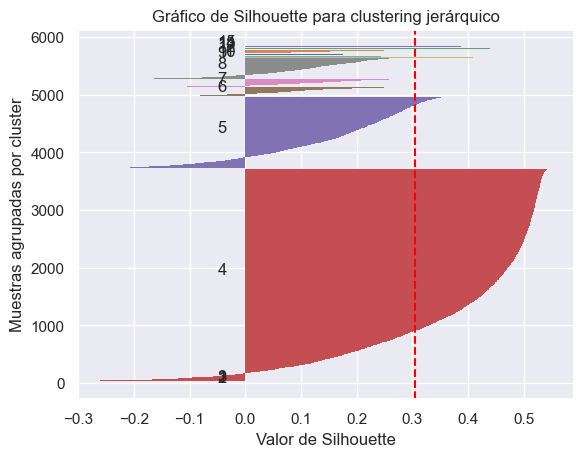

Silhouette promedio: 0.30604124409139616 para corte en 16 con distancia complete


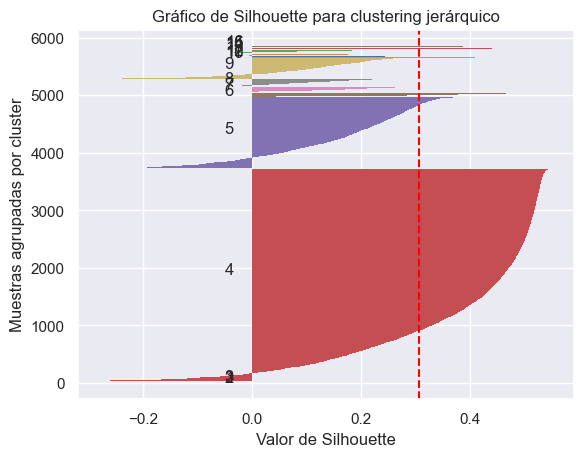

Silhouette promedio: 0.30644273698106245 para corte en 17 con distancia complete


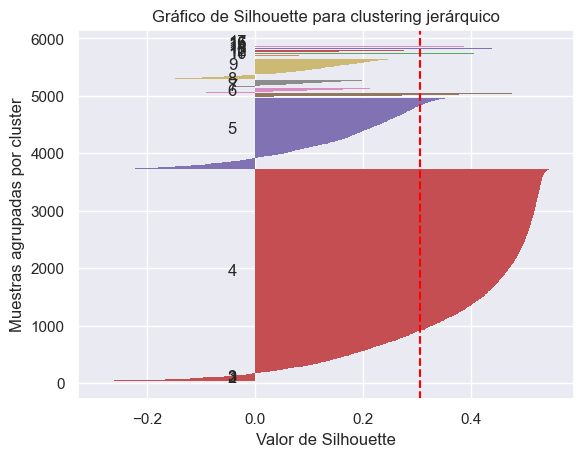

Silhouette promedio: 0.2362391136314622 para corte en 18 con distancia complete


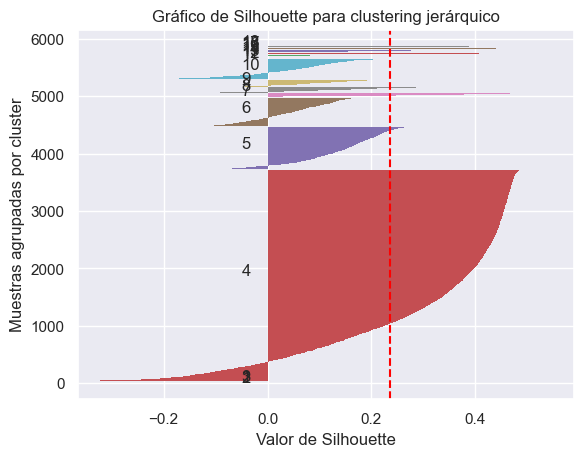

Silhouette promedio: 0.23630016077021349 para corte en 19 con distancia complete


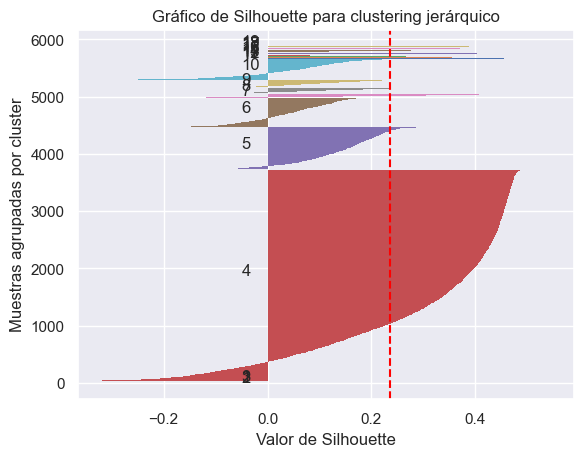

Silhouette promedio: 0.2361050564564801 para corte en 20 con distancia complete


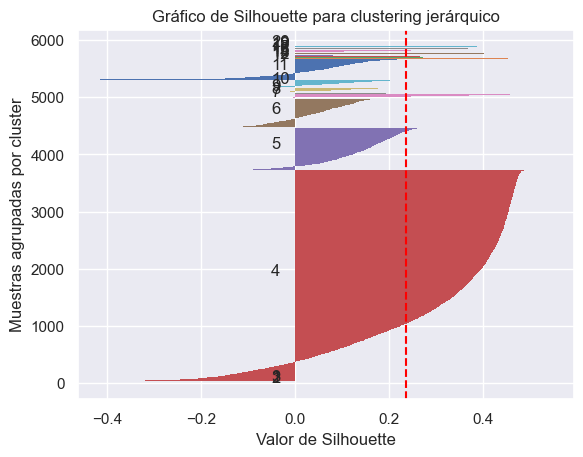

Silhouette promedio: 0.23608144882069246 para corte en 21 con distancia complete


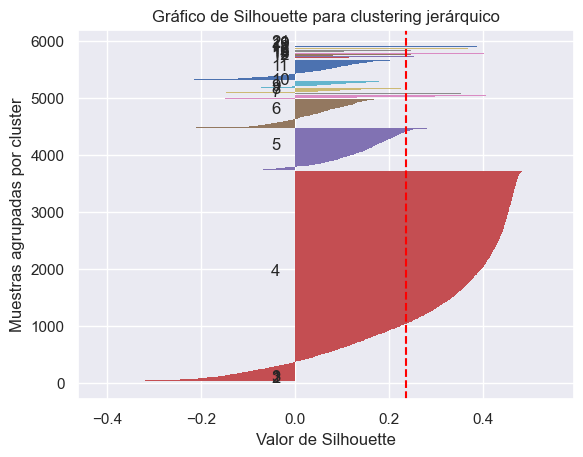

Silhouette promedio: 0.23944230729299593 para corte en 22 con distancia complete


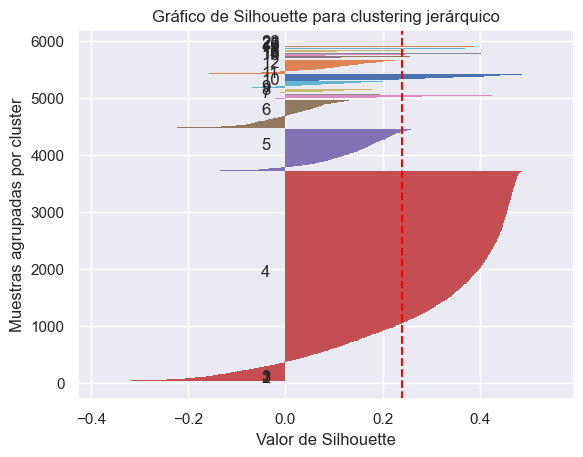

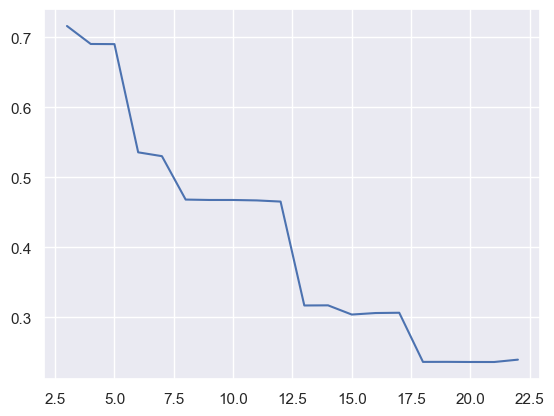

In [270]:
medidas_de_distancia = ['cosine', 'manhattan', 'chebyshev']
for medida in medidas_de_distancia:
    dist_matrix = pairwise_distances(features, metric=medida)
    dist_matrix.shape
    is_symmetric = np.allclose(dist_matrix, dist_matrix.T)
    print("¿Es simétrica?", is_symmetric)
    print(np.any(dist_matrix > 0))
    dist_matrix_pca = (dist_matrix + dist_matrix.T) / 2
    dist_matrix_pca.shape
    dist_condensed = squareform(dist_matrix_pca)
    dist_condensed.shape
    metodos = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
    cophenet_distances = {}
    for z in metodos:
        Z = linkage(dist_matrix_pca, method=z)
        c, coph_dists = cophenet(Z, squareform(dist_matrix_pca))
        print(f"Coeficiente Cofenético para {z}: {c}")
        cophenet_distances[z] = c
    criterion = max(cophenet_distances, key=cophenet_distances.get)
    print (criterion)
    Z = linkage(dist_matrix_pca, method=criterion)

    silhoutte_scores_jeraquico = []

    unico = pd.unique(ph_labels)
    for i in np.arange(3,max(unico) ):
        
        labels_jerarquico = fcluster(Z, i, criterion='maxclust')
        sil_vals = silhouette_samples(dist_matrix_pca, labels_jerarquico, metric='euclidean')
        sil_avg = silhouette_score(dist_matrix_pca, labels_jerarquico, metric='euclidean')
        print("Silhouette promedio:", sil_avg, "para corte en", i, "con distancia", criterion)
        silhoutte_scores_jeraquico.append(sil_avg)
        n_clusters = len(np.unique(labels_jerarquico))
        y_lower = 10
        for i, cluster_id in enumerate(np.unique(labels_jerarquico)):
            cluster_sil_vals = sil_vals[labels_jerarquico == cluster_id]
            cluster_sil_vals.sort()
            size_cluster = cluster_sil_vals.shape[0]
            y_upper = y_lower + size_cluster
            plt.barh(range(y_lower, y_upper),
                    cluster_sil_vals,
                    height=1.0,
                    edgecolor='none')
            plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster_id))
            y_lower = y_upper + 10
        plt.axvline(x=sil_avg, color="red", linestyle="--")
        plt.xlabel("Valor de Silhouette")

        plt.ylabel("Muestras agrupadas por cluster")
        plt.title("Gráfico de Silhouette para clustering jerárquico")
        plt.show()
    plt.plot(np.arange(3,max(unico)), silhoutte_scores_jeraquico)

## Clustering PCA K-medoids

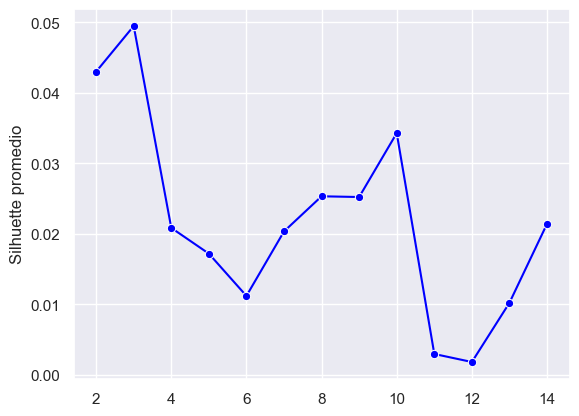

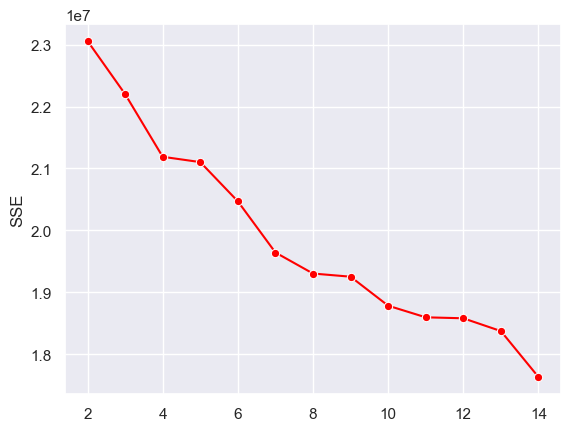

In [325]:


range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(dist_matrix)

    silh.append(silhouette_score(dist_matrix,KM.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM,dist_matrix))

sns.lineplot(x = range_k, y= silh, marker='o', color='blue')    
plt.ylabel('Silhuette promedio')
plt.show()

sns.lineplot(x= range_k, y = sse,marker='o', color='red')
plt.ylabel('SSE')
plt.show()

In [ ]:
KM = KMedoids(n_clusters=3,metric='precomputed',init='heuristic').fit(dist_matrix)


## Latent feature analysis

### DBSCAN Label

In [81]:
print(features.shape)
df_f = pd.DataFrame({'f_label': ph_labels, 'dbscan_label': labels_dbscan})


(5688, 4096)


In [82]:
df_km = pd.DataFrame({'f_label': ph_labels, 'kmedoids_label': KM.labels_})

In [83]:
dicc_labels_invertido = {v : k for k, v in dicc_labels.items()}

In [84]:
df_f['f_label'] = df_f['f_label'].map(dicc_labels_invertido)
df_f['f_label'].unique

<bound method Series.unique of 0       green_pants
1        blue_shoes
2       black_shoes
3        blue_shoes
4         red_shoes
           ...     
5683     blue_shirt
5684    white_dress
5685    white_shoes
5686     blue_shirt
5687    white_shoes
Name: f_label, Length: 5688, dtype: object>

In [85]:
df_f['dbscan_label'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [ ]:
""" Agrupamos por etiqueta de cluster ('dbscan_label') y contamos 
la proporción de categorías reales en cada cluster ('f_label')
según los resultados obtenidos al utilizar dbscan"""
    
df_f_grouped = df_f.groupby(['dbscan_label', 'f_label']).size().reset_index(name='cantidad')
df_f_grouped = df_f_grouped.sort_values('cantidad', ascending=False)
# Calculamos el porcentaje dentro de cada grupo de 'dbscan_label' usando .transform()
df_f_grouped['porcentaje'] = df_f_grouped.groupby('dbscan_label')['cantidad']\
                                         .transform(lambda x: x / x.sum())





In [87]:
for i in range(0, len(df_f['dbscan_label'].unique())):
    df = df_f_grouped.loc[(df_f_grouped['dbscan_label'] == i) & (df_f_grouped['cantidad'] > 10)]
    cluster_info = f"Cluster {i} contiene"
    for indice , row in df.iterrows():
        cluster_info += f" {round(row['porcentaje'], 2)} porciento de imágenes de la clase {row['f_label']},"
    print(cluster_info)
        

Cluster 0 contiene 0.23 porciento de imágenes de la clase black_pants, 0.21 porciento de imágenes de la clase blue_pants, 0.09 porciento de imágenes de la clase black_shorts, 0.08 porciento de imágenes de la clase brown_pants, 0.08 porciento de imágenes de la clase red_pants, 0.08 porciento de imágenes de la clase blue_shorts, 0.07 porciento de imágenes de la clase white_pants, 0.06 porciento de imágenes de la clase green_pants, 0.04 porciento de imágenes de la clase green_shorts, 0.03 porciento de imágenes de la clase white_shorts, 0.01 porciento de imágenes de la clase brown_shorts, 0.01 porciento de imágenes de la clase black_shoes,
Cluster 1 contiene 0.34 porciento de imágenes de la clase black_shoes, 0.23 porciento de imágenes de la clase blue_shoes, 0.21 porciento de imágenes de la clase brown_shoes, 0.2 porciento de imágenes de la clase green_shoes,
Cluster 2 contiene 0.98 porciento de imágenes de la clase red_shoes,
Cluster 3 contiene 0.48 porciento de imágenes de la clase blue

### K-medoids

In [ ]:
# Se realiza el mismo proceso para el clustering con KMedoids

df_km['f_label'] = df_km['f_label'].map(dicc_labels_invertido)
df_km['f_label'].unique


# Agrupamos y contamos la cantidad de ocurrencias de cada combinación de 'kmedoids_label' y 'f_label'
df_f_grouped = df_km.groupby(['kmedoids_label', 'f_label']).size().reset_index(name='cantidad')
df_f_grouped = df_f_grouped.sort_values('cantidad', ascending=False)
# Calculamos el porcentaje dentro de cada grupo de 'dbscan_label' usando .transform()
df_f_grouped['porcentaje'] = df_f_grouped.groupby('kmedoids_label')['cantidad']\
                                         .transform(lambda x: x / x.sum())





In [91]:
for i in range(0, len(df_km['kmedoids_label'].unique())):
    df = df_f_grouped.loc[(df_f_grouped['kmedoids_label'] == i) & (df_f_grouped['cantidad'] > 10)]
    cluster_info = f"Cluster {i} contiene"
    for indice , row in df.iterrows():
        cluster_info += f" {round(row['porcentaje'], 2)} porciento de imágenes de la clase {row['f_label']},"
    print(cluster_info)
        

Cluster 0 contiene 0.19 porciento de imágenes de la clase black_pants, 0.18 porciento de imágenes de la clase white_dress, 0.17 porciento de imágenes de la clase blue_pants, 0.07 porciento de imágenes de la clase black_shorts, 0.07 porciento de imágenes de la clase brown_pants, 0.07 porciento de imágenes de la clase red_pants, 0.06 porciento de imágenes de la clase blue_shorts, 0.06 porciento de imágenes de la clase white_pants, 0.05 porciento de imágenes de la clase green_pants, 0.03 porciento de imágenes de la clase green_shorts, 0.03 porciento de imágenes de la clase white_shorts, 0.01 porciento de imágenes de la clase brown_shorts, 0.0 porciento de imágenes de la clase black_shoes,
Cluster 1 contiene 0.23 porciento de imágenes de la clase red_dress, 0.21 porciento de imágenes de la clase blue_shirt, 0.21 porciento de imágenes de la clase black_shirt, 0.14 porciento de imágenes de la clase blue_dress, 0.13 porciento de imágenes de la clase black_dress, 0.07 porciento de imágenes de 